# MDA - RBF model

In [1]:
# arrays
import numpy as np
import pandas as pd
import xarray as xr

# plotting
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# append sscode to path
import sys, os
sys.path.insert(0, '/Users/administrador/Documents/geocean-nz-ss')
# data_path = '/Volumes/ToshibaJT/geocean-nz-ss/data'
data_path = '/Users/administrador/Documents/geocean-nz-ss/data'
os.environ["SSURGE_DATA_PATH"] = data_path

# custom
from sscode.config import default_region_reduced, \
    default_evaluation_metrics, data_path
from sscode.data import Loader, load_moana_hindcast_ss
from sscode.mda_rbf import MDA_RBF_Model
from sscode.plotting.validation import plot_stats

# this is to allow plots to be centered
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

DATA PATH /Users/administrador/Documents/geocean-nz-ss/data


In [2]:
# load the data
load_cfsr_moana_uhslc = Loader(
    data_to_load=['cfsr','moana','uhslc'], plot=(False,False,False),
    load_predictor_files=(True,
        [data_path+'/cfsr/CFSR_MSLP_daily.nc',data_path+'/cfsr/CFSR_WINDs_daily.nc']
    ) # load previously calculated winds
)


 loading previously saved atmospheric data from ['/Users/administrador/Documents/geocean-nz-ss/data/cfsr/CFSR_MSLP_daily.nc', '/Users/administrador/Documents/geocean-nz-ss/data/cfsr/CFSR_WINDs_daily.nc'] 


 loading the UHSLC tidal guages... 



In [3]:
load_cfsr_moana_uhslc.predictor_slp, load_cfsr_moana_uhslc.predictor_wind, load_cfsr_moana_uhslc.predictand

(<xarray.Dataset>
 Dimensions:    (time: 11354, longitude: 101, latitude: 101)
 Coordinates:
   * time       (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2021-01-31
   * longitude  (longitude) float32 140.0 140.5 141.0 141.5 ... 189.0 189.5 190.0
   * latitude   (latitude) float32 -70.0 -69.5 -69.0 -68.5 ... -21.0 -20.5 -20.0
 Data variables:
     SLP        (time, latitude, longitude) float64 ...,
 <xarray.Dataset>
 Dimensions:          (time: 11444, lat: 160, lon: 161)
 Coordinates:
   * time             (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2021-05-01
   * lat              (lat) float32 -69.78 -69.47 -69.16 ... -20.76 -20.45 -20.14
   * lon              (lon) float32 140.0 140.3 140.6 140.9 ... 189.4 189.7 190.0
 Data variables:
     U_GRD_L103       (time, lat, lon) float32 ...
     V_GRD_L103       (time, lat, lon) float32 ...
     wind_proj        (time, lat, lon) float64 ...
     bearings         (lat, lon) float64 ...
     direc_proj_math  (lat, lon) float64 ...
  


 Initializing the MDA + RBF constructor... 


 with longitudes = [171.2, 171.6, 178.2, 183.5] 
 
 and 
 
 latitudes = [-41.5, -44.1, -37.4, -43.9] !!                 

 for the specified middle locations / shores !!

 lets calculate the storm surge pcs... 


 All the SS pcs have been calculated, lets plot what we got!! 



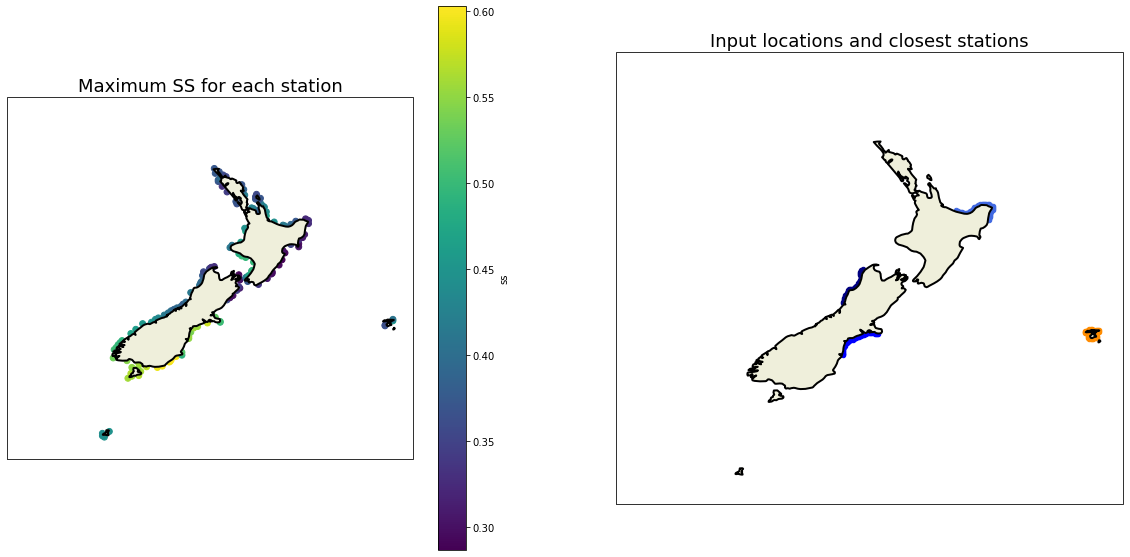


 data will be resampled to 1D 

 and the PC analysis             will be calculated using the parameters 

 {'pres_vars': ('SLP', 'longitude', 'latitude'), 'calculate_gradient': True, 'wind': None, 'wind_vars': ('wind_proj_mask', 'lon', 'lat', 'U_GRD_L103', 'V_GRD_L103'), 'time_lapse': 2, 'time_resample': '1D', 'region': (True, (160, 185, -52, -30)), 'pca_plot': (True, False, 1), 'verbose': True, 'pca_ttls': ['SLP in t', 'Grad in t', 'SLP in t-1', 'Grad in t-1', 'SLP in t-2', 'Grad in t-2'], 'pcs_folder': '/Users/administrador/Documents/geocean-nz-ss/data/cfsr/'} 


 lets calculate the slp pcs... 

 

             The slp pcs will be calculated for all the locations / shores...             

/Users/administrador/Documents/geocean-nz-ss/data/cfsr/ ['default_region_reduced', 'no_winds', 'gradients', '1D', 'tl2']
FILE /Users/administrador/Documents/geocean-nz-ss/data/cfsr/default_region_reduced_no_winds_gradients_1D_tl2.nc
PCs loaded from file

 plotting 1 components with 4 EOFs + PC... 

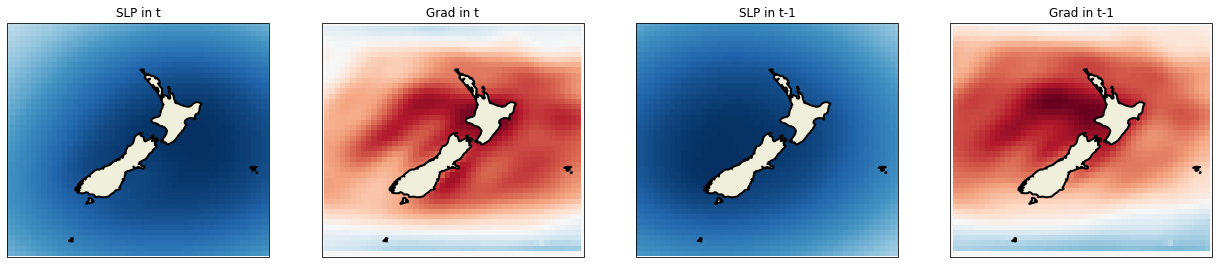

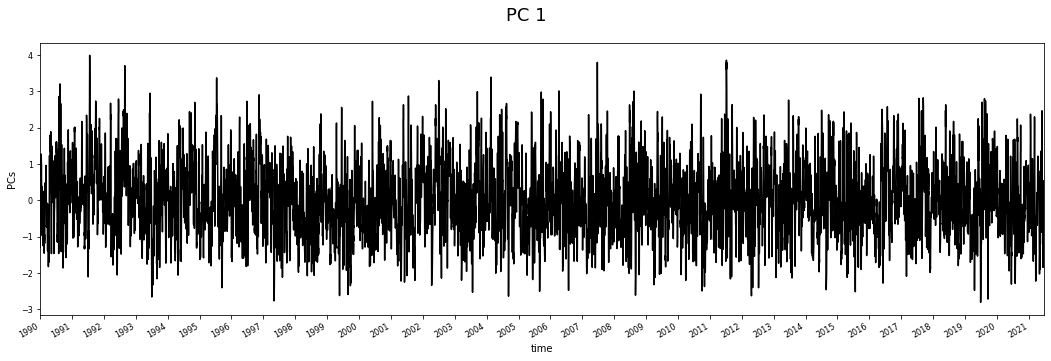

In [4]:
# dict to pca
pca_attrs_default = {
    'pres_vars': ('SLP','longitude','latitude'),
    'calculate_gradient': True,
    'wind': None, 
    'wind_vars': ('wind_proj_mask','lon','lat','U_GRD_L103','V_GRD_L103'),
    'time_lapse': 2, # 1 equals to NO time delay,
    'time_resample': '1D', 'region': (True,default_region_reduced),
    'pca_plot': (True,False,1), 'verbose': True,
    'pca_ttls': [
        'SLP in t','Grad in t', #'Winds in t',
        'SLP in t-1','Grad in t-1', #'Winds in t-1',
        'SLP in t-2','Grad in t-2', #'Winds in t-2'
    ],
    'pcs_folder':'/Users/administrador/Documents/geocean-nz-ss/data/cfsr/'
}
sites_to_analyze = np.unique(
    [ 
        689,328,393,1327,393,480,999,116,224,1124,949,708, # UHSLC
        1296,378,1124,780,613,488,1442,1217,578,200,1177,1025,689,949,224,1146, # LINZ
        1174,1260,1217,744,1064,1214,803,999 # OTHER (ports...)
    ]
)[::20]

# construct the MDA + RBF object
mda_rbf_model = MDA_RBF_Model(
    load_cfsr_moana_uhslc.predictand, # this is the storm surge 
    # ss_moanav2_site.transpose('site','time'),
    load_cfsr_moana_uhslc.predictor_slp.SLP,
    pca_attrs_default, # all params to calculate the pcs
    model_metrics=default_evaluation_metrics,
    # -------------------------------------------------------- #
    # set sites_to_analyze to None to shore analysis
    # sites_to_analyze=list(sites_to_analyze),
    # -------------------------------------------------------- #
    # lons=[173],lats=[-41.58],min_dist_th=[10000],extra_help=[('lat',50)]
)

In [ ]:
# these are the final sites by shore
# np.save('../data/statistics/shore_sites_last.npy',np.array(mda_rbf_model.shore_sites))


 Lets interpolate the SS using all the calculated             pcs (slp + ss) and the MDA+RBF technique!!             This interpolation will be performed in all the locations!! 


 KFold=0 || Lets reconstruct the SS for location 1!! 


 ------------------------------------------------------------- 


 MDA + RBF with 0.9 per of pcs and 50 samples!! 

 which means 36 PCs... 


 ------------------------------------------------------------- 





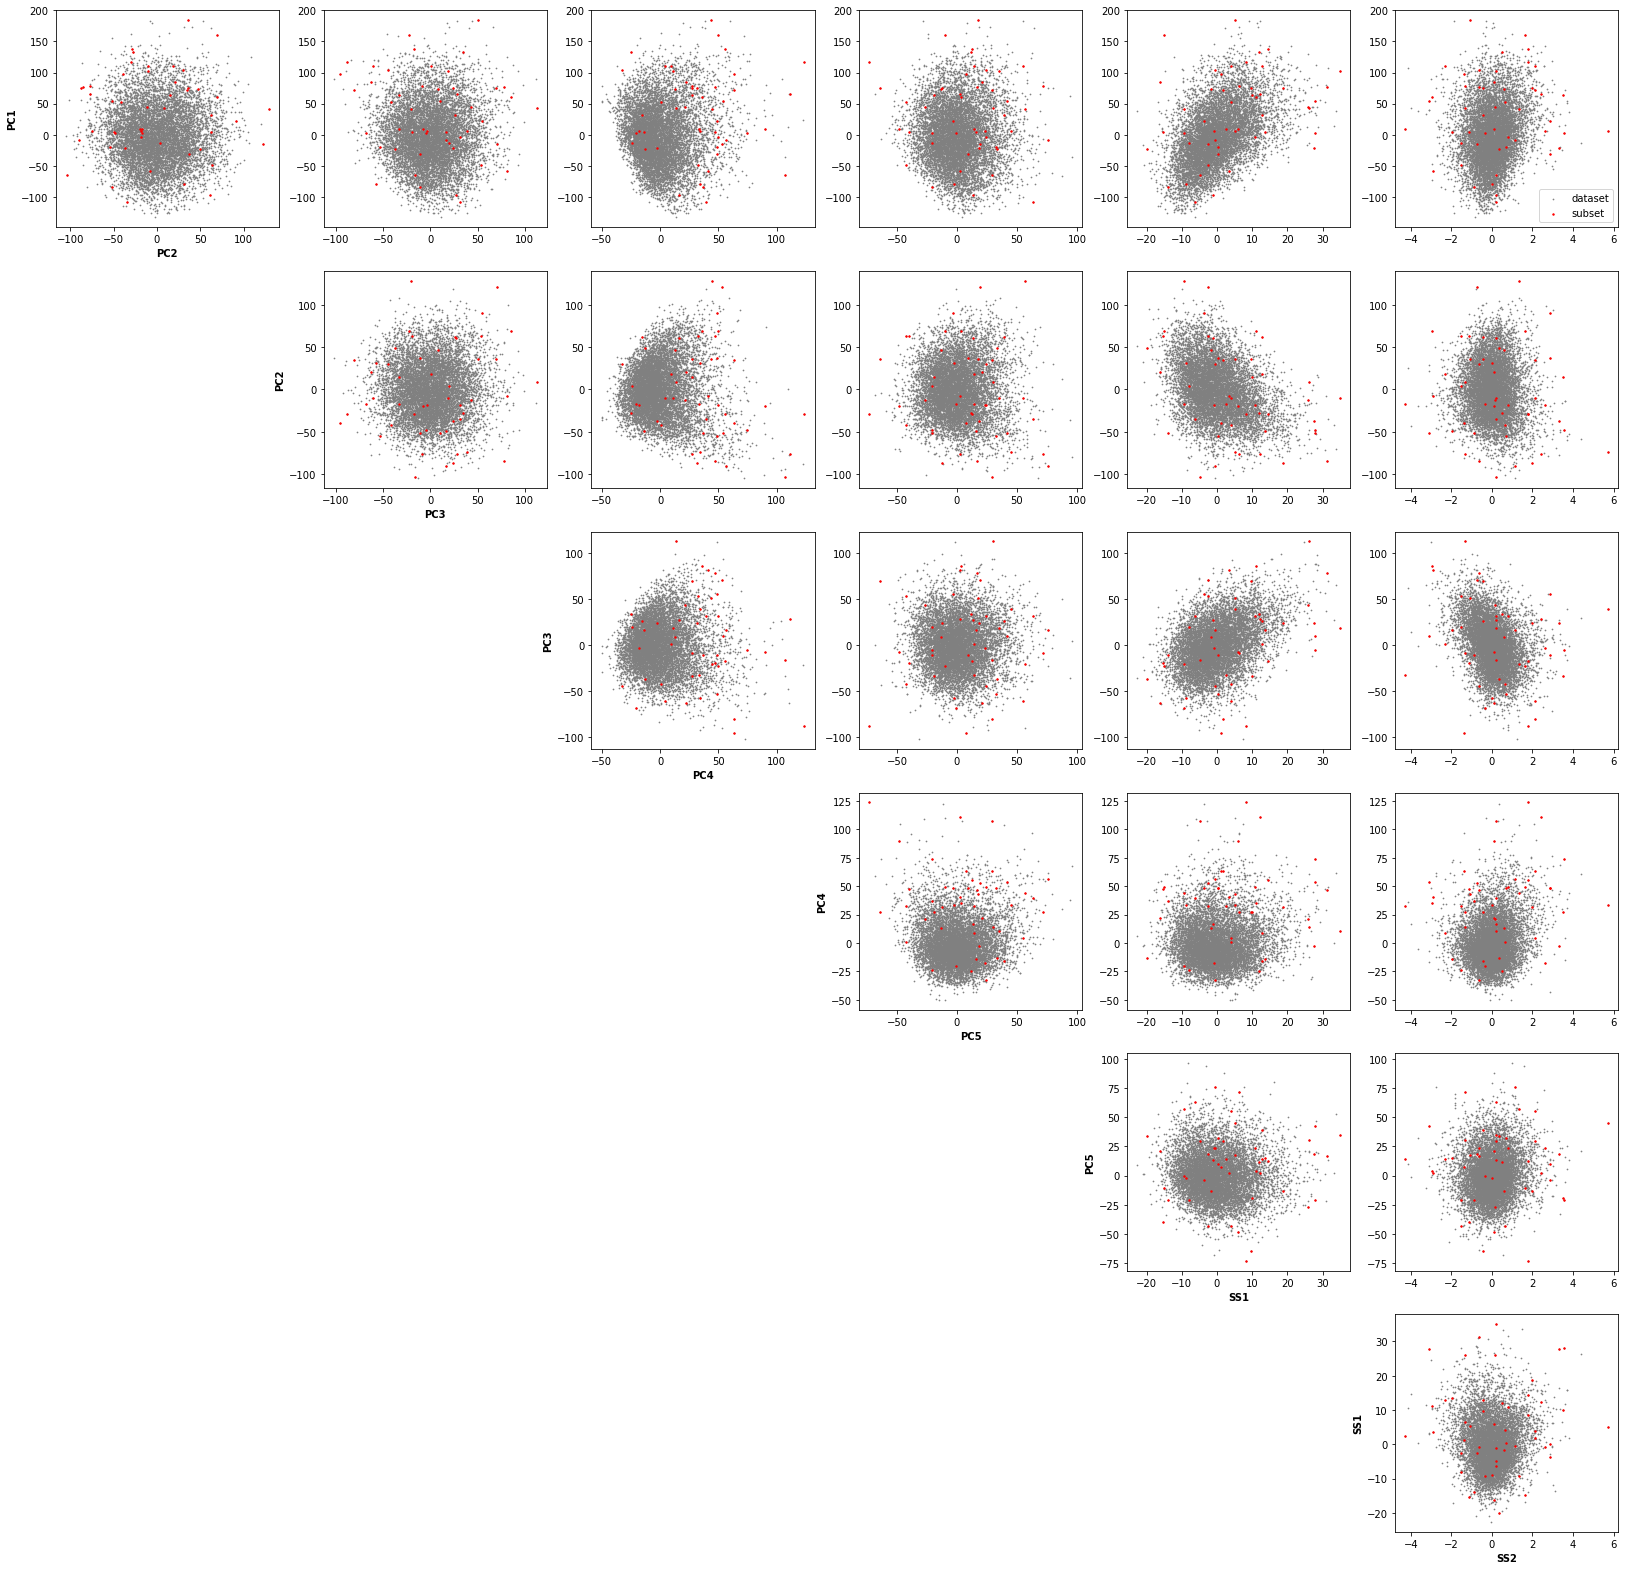

We finally have 55 points to interpolate with RBF!! 


ix_scalar: 0,  optimization: 0.78 | interpolation: 0.58 | sigma: 0.5791
ix_scalar: 1,  optimization: 0.71 | interpolation: 0.68 | sigma: 0.6838


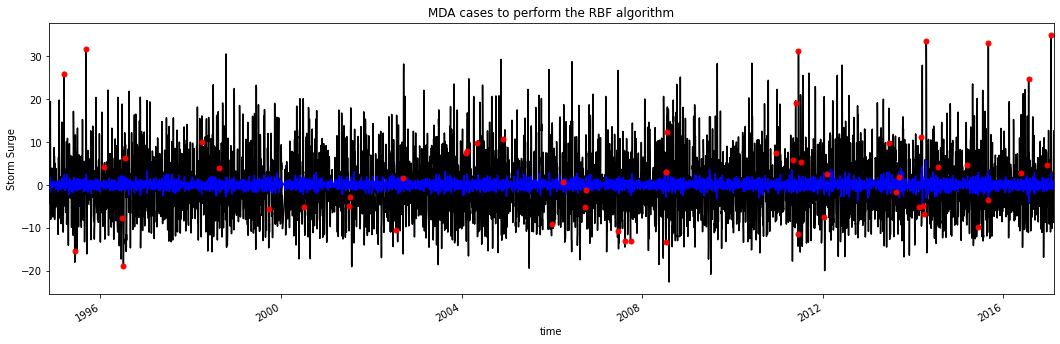

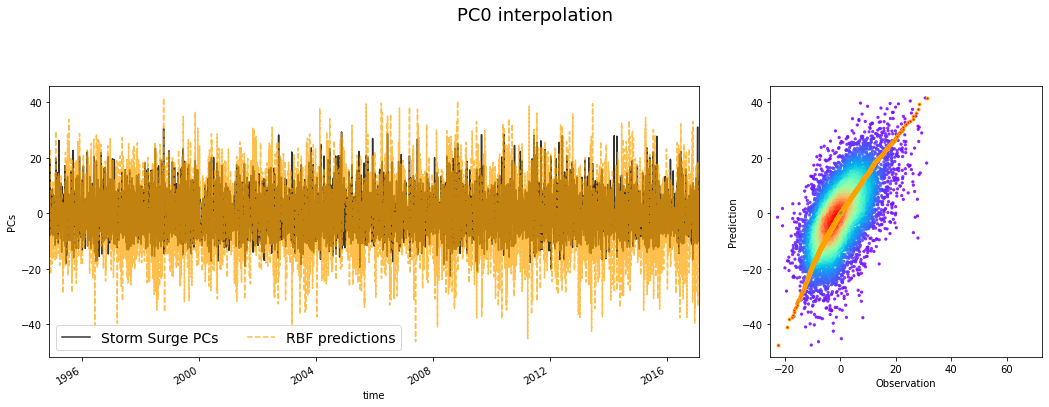

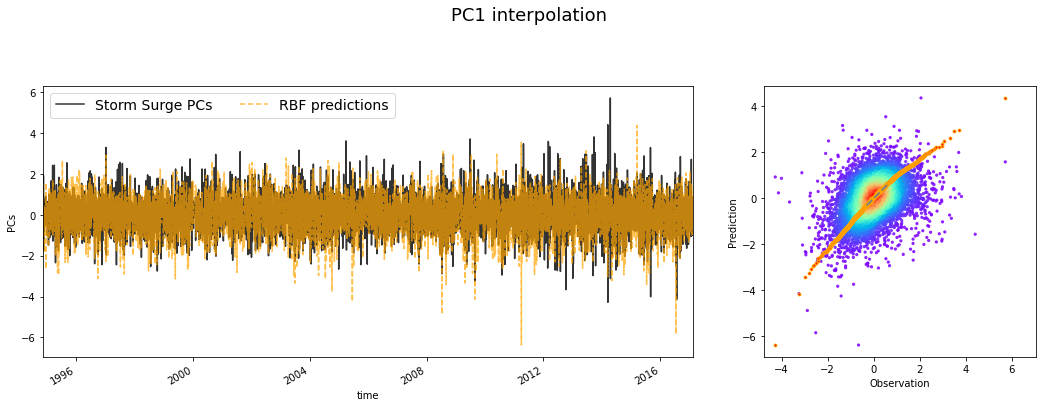

RBFs Kfold Validation: 1/2
ix_scalar: 0,  optimization: 0.24 | interpolation: 0.00 | sigma: 0.0023
ix_scalar: 1,  optimization: 0.17 | interpolation: 0.00 | sigma: 0.0024
mean squared error : 277.80810316520314

RBFs Kfold Validation: 2/2
ix_scalar: 0,  optimization: 0.54 | interpolation: 0.00 | sigma: 0.0025
ix_scalar: 1,  optimization: 0.23 | interpolation: 0.00 | sigma: 0.0023
mean squared error : 142.27216461614043

<xarray.Dataset>
Dimensions:             (n_split: 2, train: 28, test: 28)
Coordinates:
  * n_split             (n_split) int64 0 1
Dimensions without coordinates: train, test
Data variables:
    mean_squared_error  (n_split) float64 277.8 142.3
    train_index         (train, n_split) float64 1.0 0.0 3.0 ... 50.0 nan 53.0
    test_index          (test, n_split) float64 0.0 1.0 2.0 ... 54.0 53.0 nan

 Lets plot the SS reconstructions for location 1!! 


 KFold=1 || Lets reconstruct the SS for location 1!! 


 -------------------------------------------------------------

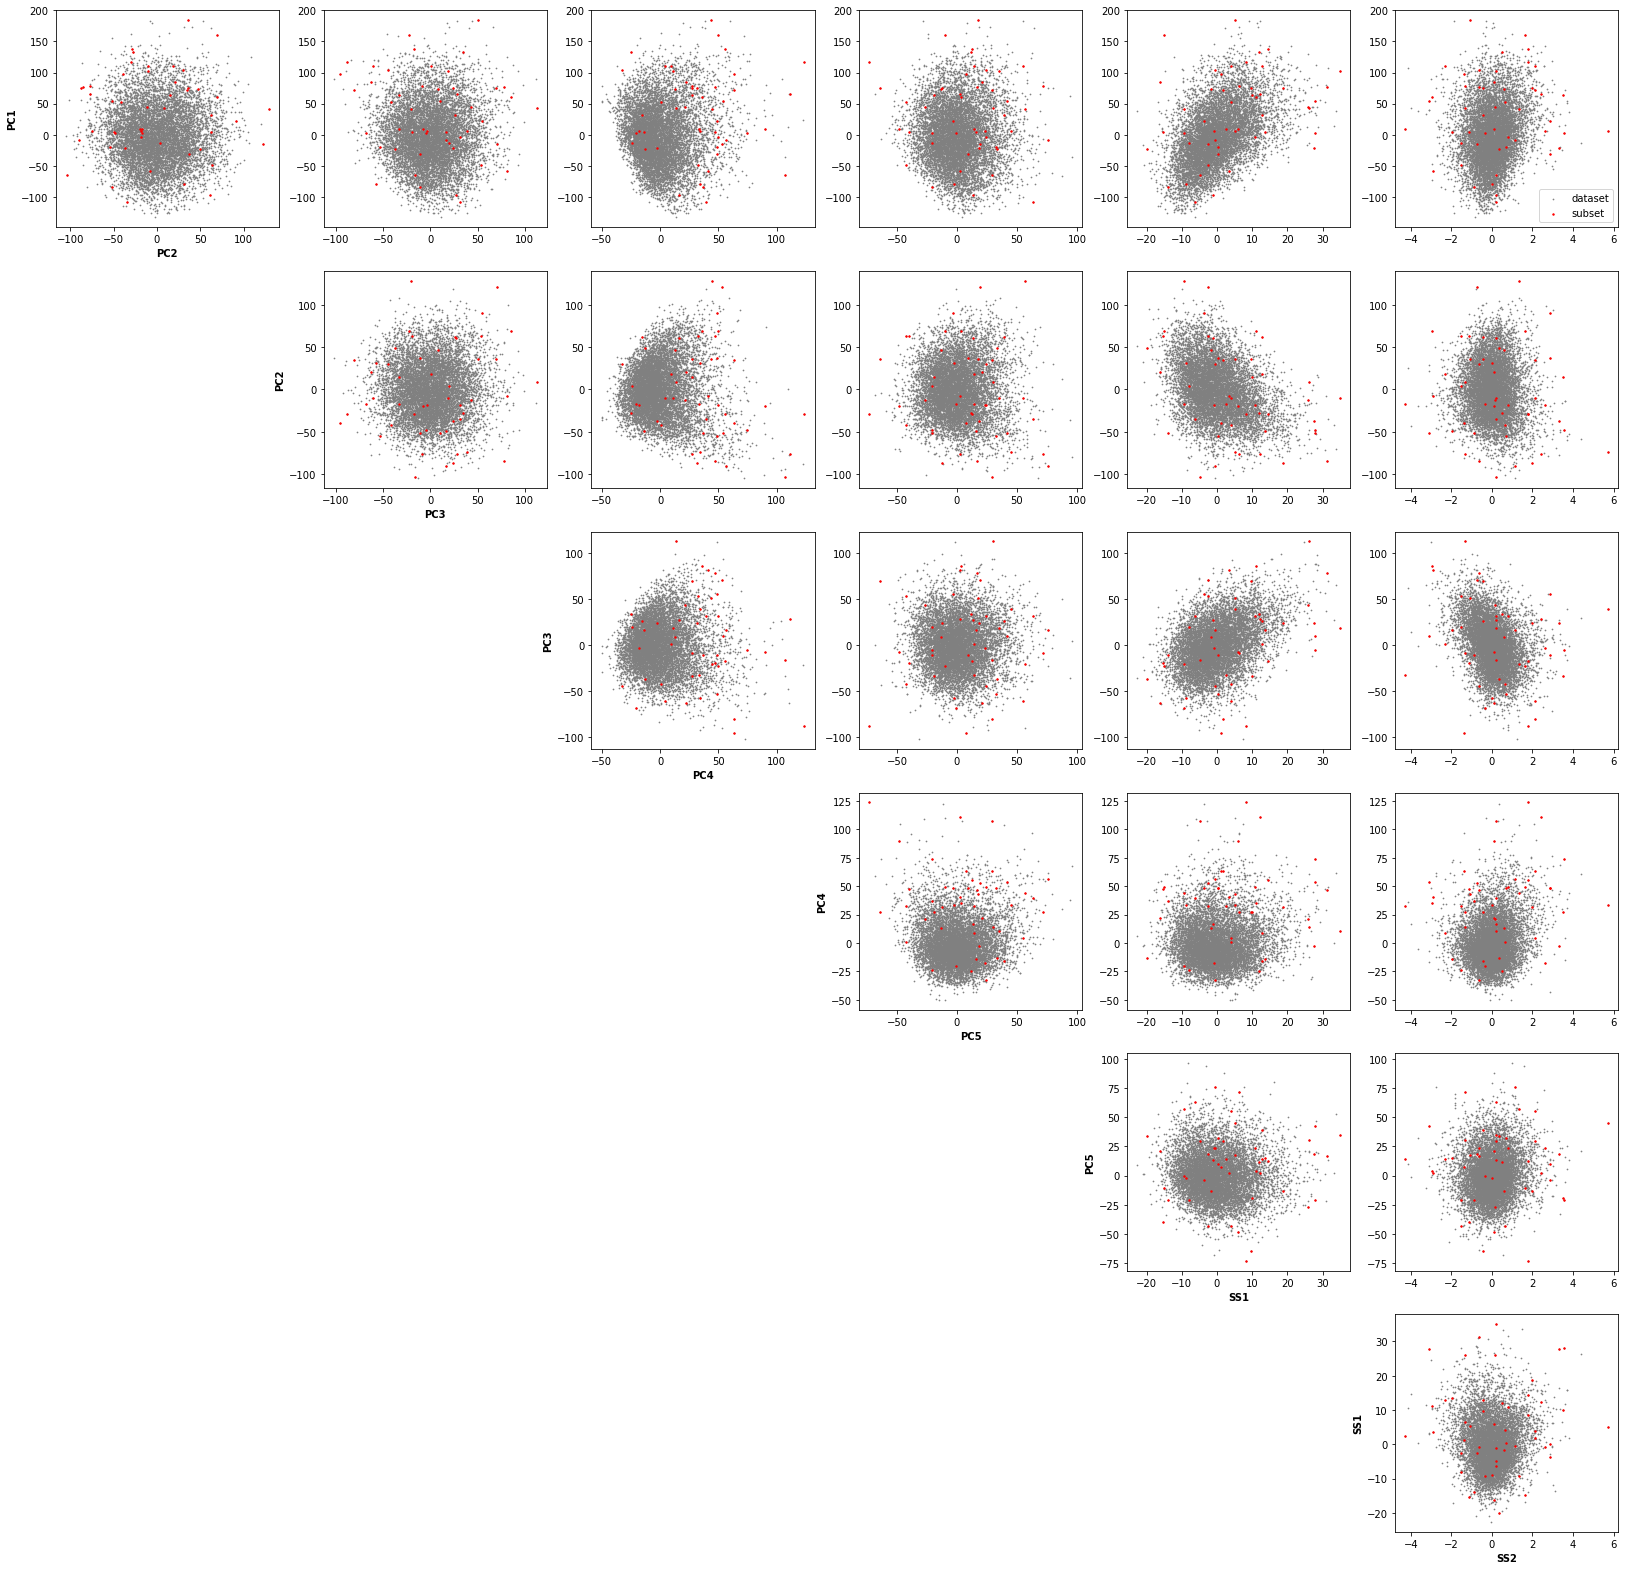

We finally have 55 points to interpolate with RBF!! 


ix_scalar: 0,  optimization: 0.74 | interpolation: 0.48 | sigma: 0.4770
ix_scalar: 1,  optimization: 0.61 | interpolation: 0.47 | sigma: 0.4687


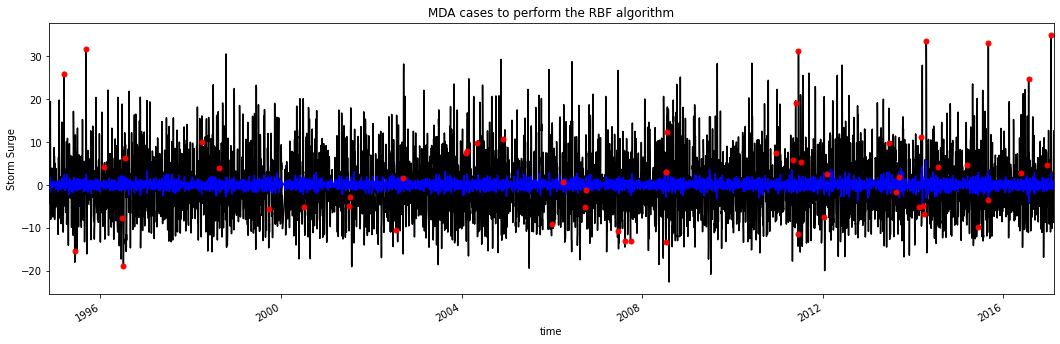

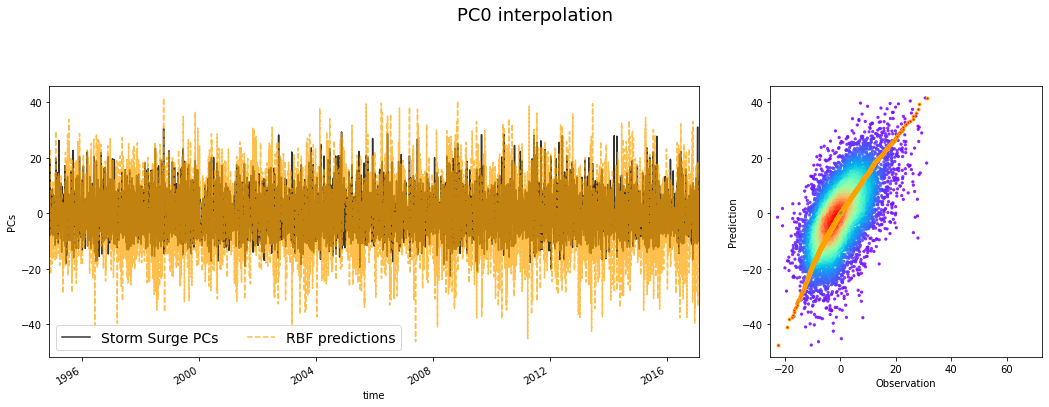

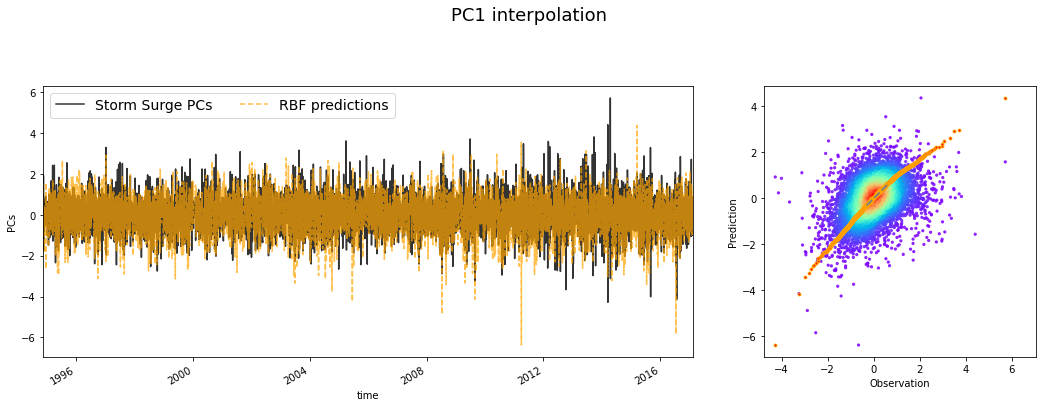

RBFs Kfold Validation: 1/2
ix_scalar: 0,  optimization: 0.24 | interpolation: 0.00 | sigma: 0.0034
ix_scalar: 1,  optimization: 0.20 | interpolation: 0.00 | sigma: 0.0026
mean squared error : 302.30355715017123

RBFs Kfold Validation: 2/2
ix_scalar: 0,  optimization: 0.17 | interpolation: 0.00 | sigma: 0.0022
ix_scalar: 1,  optimization: 0.17 | interpolation: 0.00 | sigma: 0.0022
mean squared error : 80.88974406699124

<xarray.Dataset>
Dimensions:             (n_split: 2, train: 28, test: 28)
Coordinates:
  * n_split             (n_split) int64 0 1
Dimensions without coordinates: train, test
Data variables:
    mean_squared_error  (n_split) float64 302.3 80.89
    train_index         (train, n_split) float64 0.0 1.0 4.0 ... 50.0 nan 54.0
    test_index          (test, n_split) float64 1.0 0.0 2.0 ... 53.0 54.0 nan

 Lets plot the SS reconstructions for location 1!! 


 KFold=0 || Lets reconstruct the SS for location 2!! 


 ------------------------------------------------------------- 

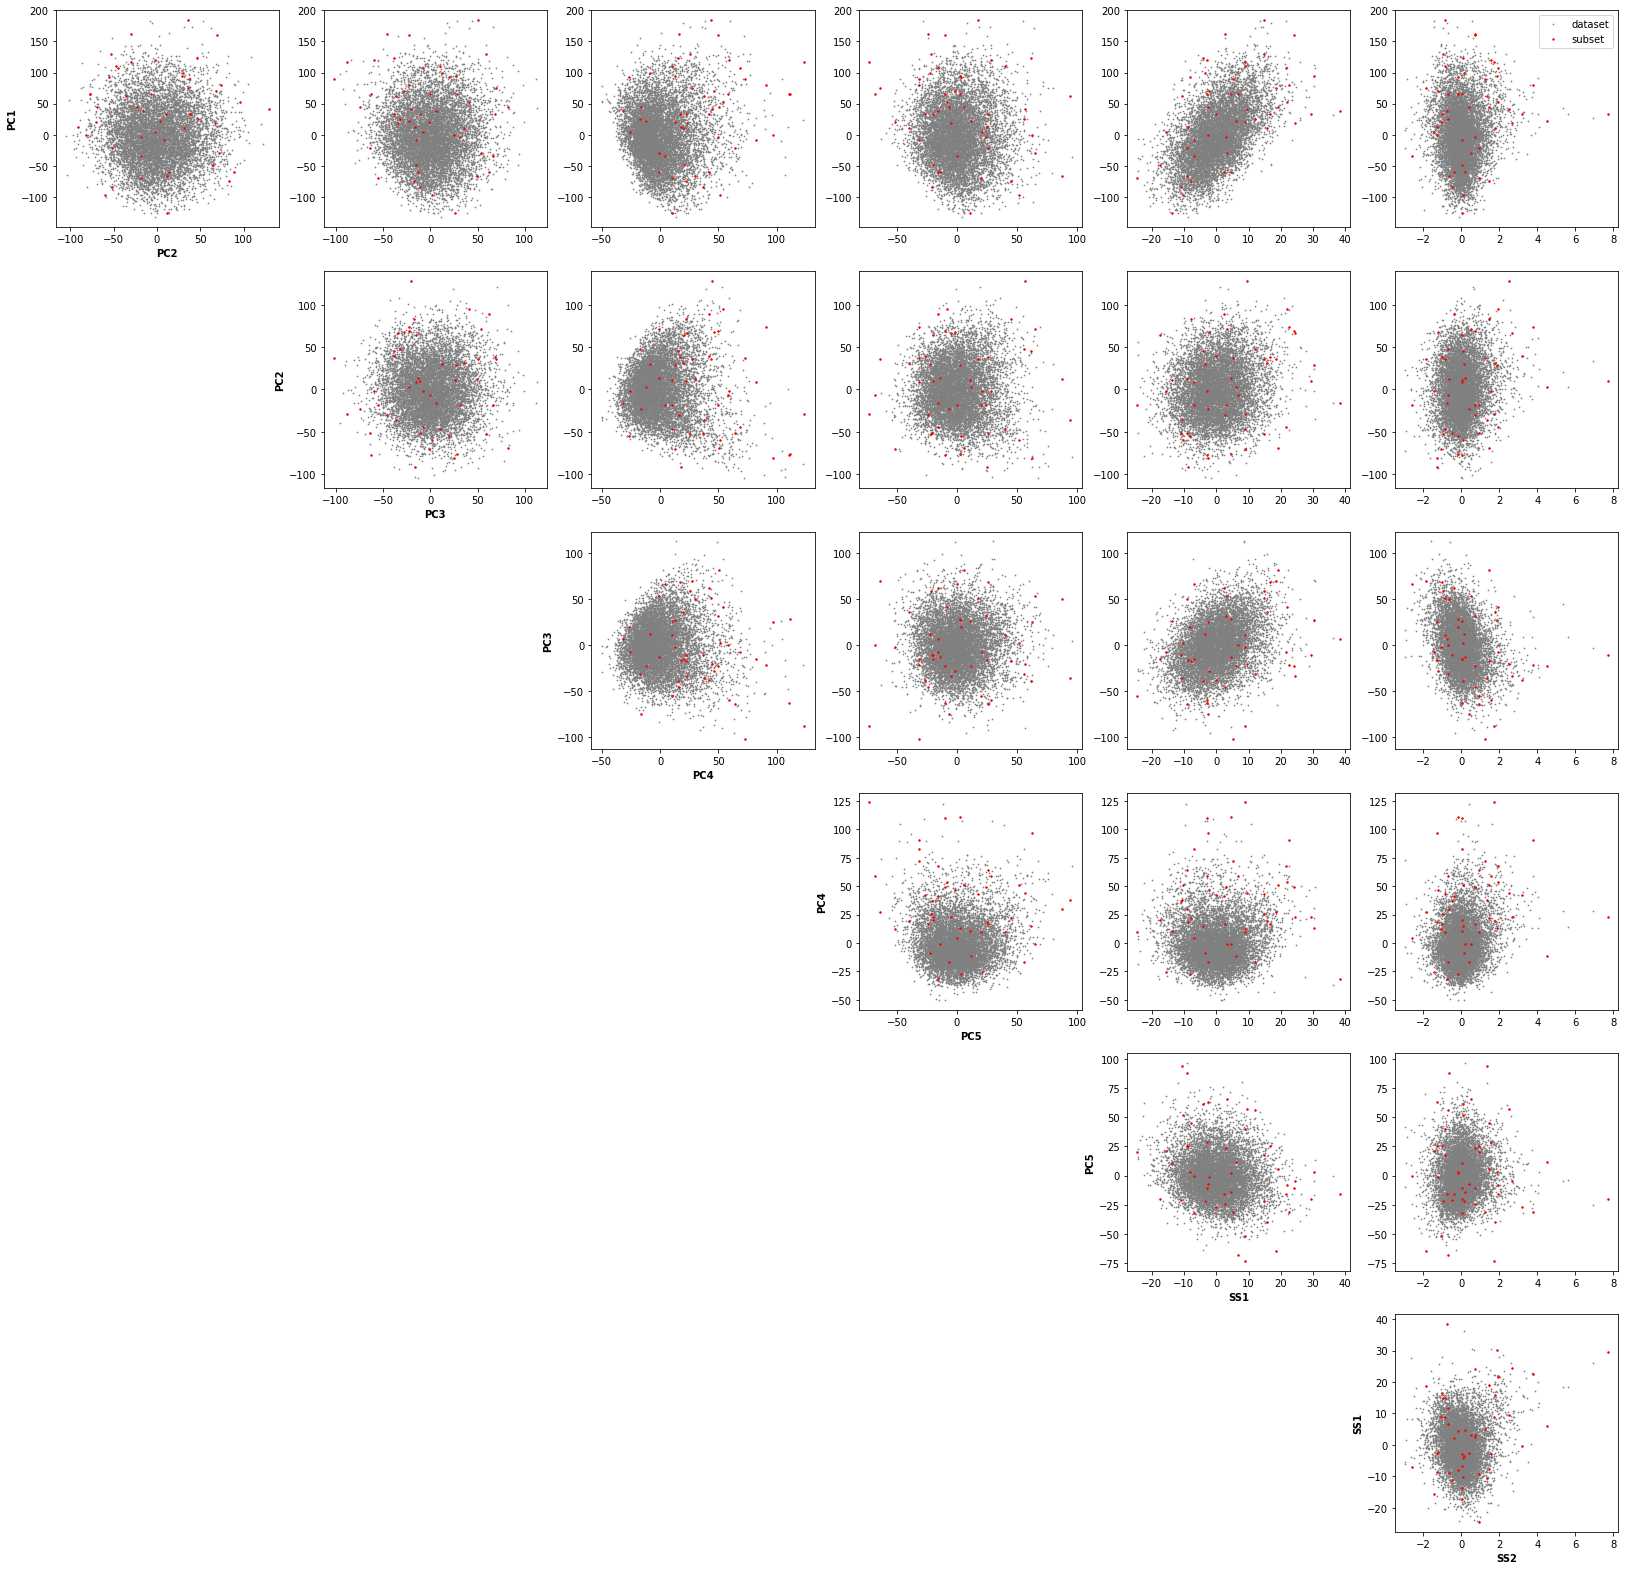

We finally have 55 points to interpolate with RBF!! 


ix_scalar: 0,  optimization: 0.27 | interpolation: 0.47 | sigma: 0.4689
ix_scalar: 1,  optimization: 0.34 | interpolation: 0.48 | sigma: 0.4766


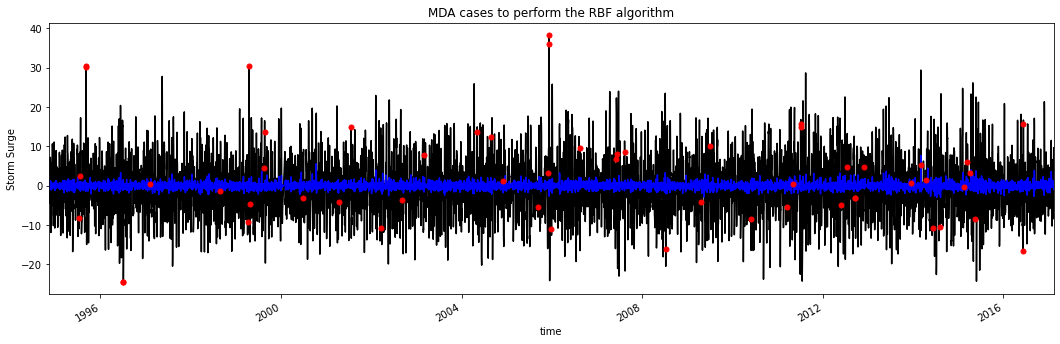

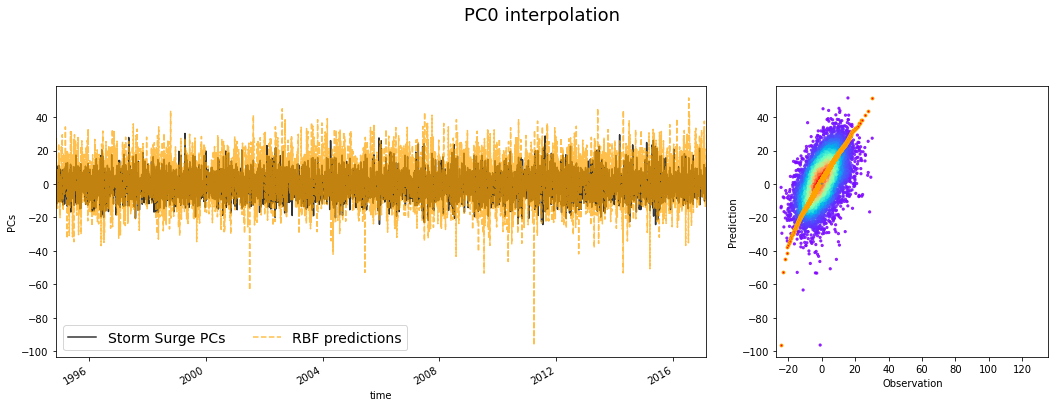

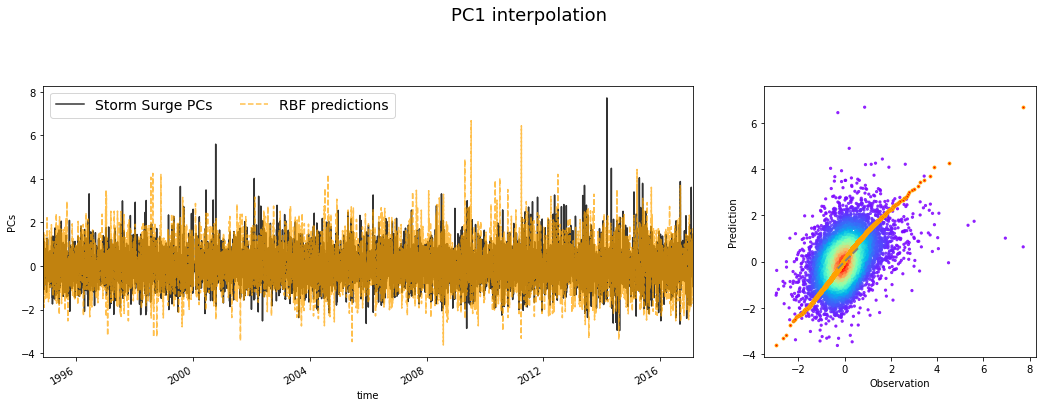

RBFs Kfold Validation: 1/2
ix_scalar: 0,  optimization: 0.13 | interpolation: 0.00 | sigma: 0.0024
ix_scalar: 1,  optimization: 0.19 | interpolation: 0.00 | sigma: 0.0022
mean squared error : 487.04540691260326

RBFs Kfold Validation: 2/2
ix_scalar: 0,  optimization: 0.21 | interpolation: 0.00 | sigma: 0.0025
ix_scalar: 1,  optimization: 0.28 | interpolation: 0.00 | sigma: 0.0022
mean squared error : 465.04401275360493

<xarray.Dataset>
Dimensions:             (n_split: 2, train: 28, test: 28)
Coordinates:
  * n_split             (n_split) int64 0 1
Dimensions without coordinates: train, test
Data variables:
    mean_squared_error  (n_split) float64 487.0 465.0
    train_index         (train, n_split) float64 0.0 2.0 1.0 ... 53.0 nan 54.0
    test_index          (test, n_split) float64 2.0 0.0 3.0 ... 52.0 54.0 nan

 Lets plot the SS reconstructions for location 2!! 


 KFold=1 || Lets reconstruct the SS for location 2!! 


 -------------------------------------------------------------

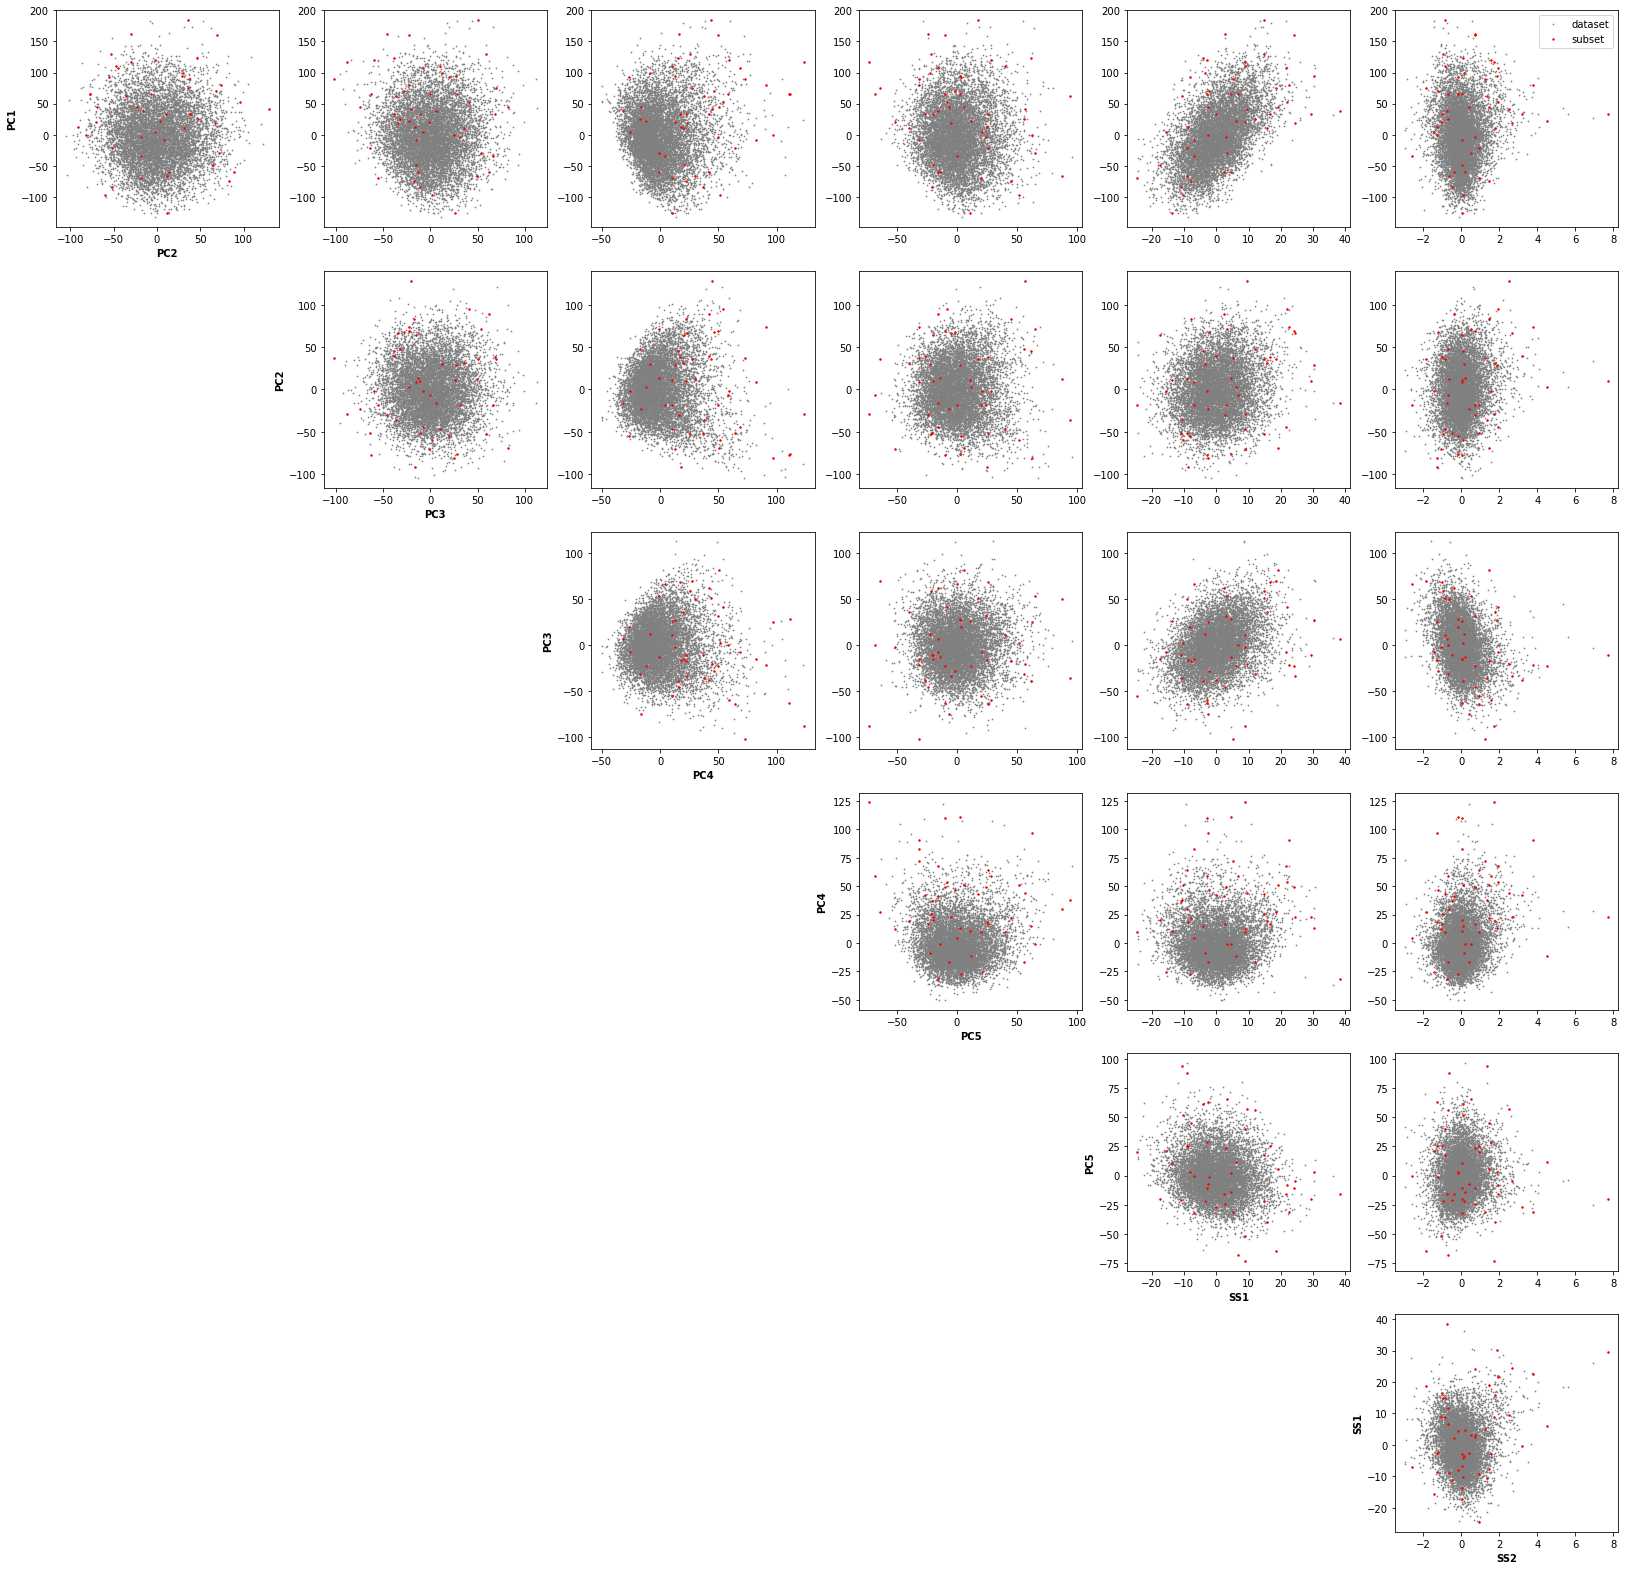

We finally have 55 points to interpolate with RBF!! 


ix_scalar: 0,  optimization: 0.27 | interpolation: 0.62 | sigma: 0.6223
ix_scalar: 1,  optimization: 0.45 | interpolation: 0.47 | sigma: 0.4714


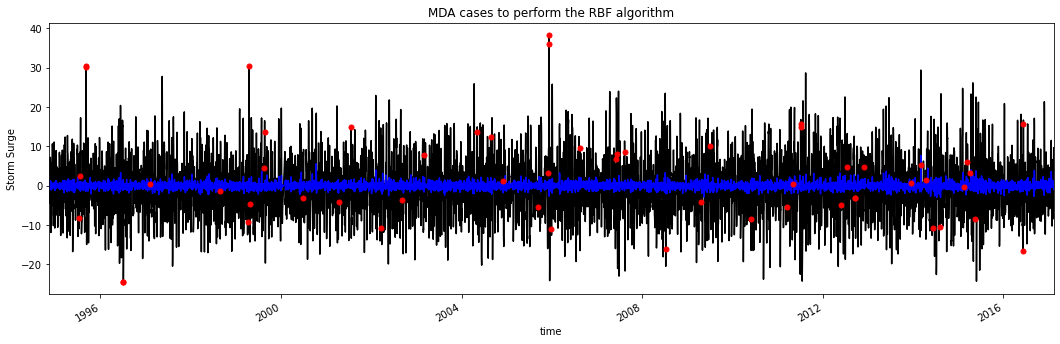

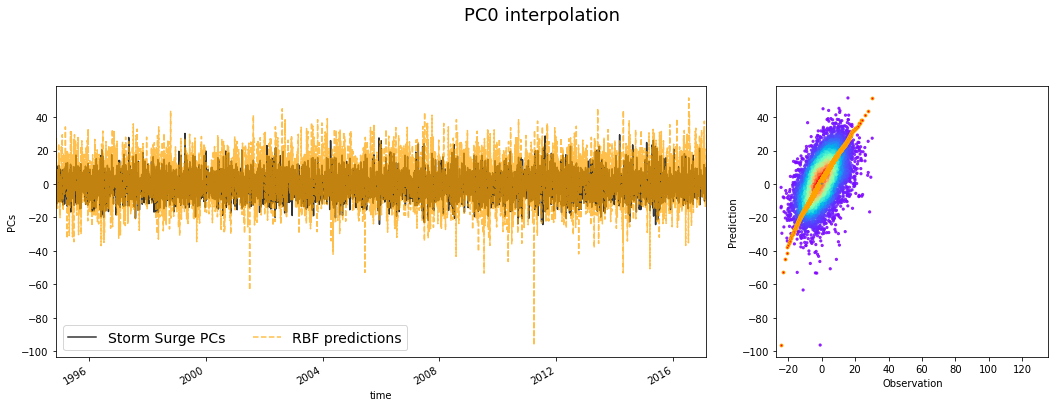

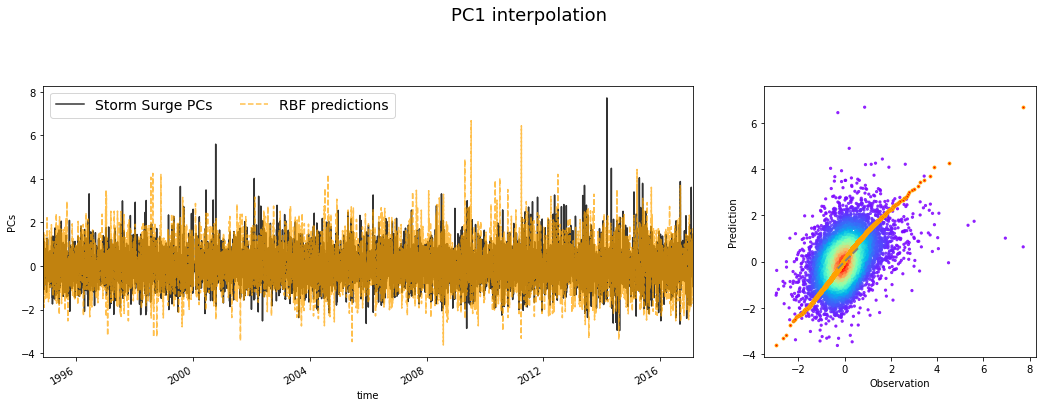

RBFs Kfold Validation: 1/2
ix_scalar: 0,  optimization: 0.19 | interpolation: 0.00 | sigma: 0.0022
ix_scalar: 1,  optimization: 0.18 | interpolation: 0.00 | sigma: 0.0022
mean squared error : 139.5513871310756

RBFs Kfold Validation: 2/2
ix_scalar: 0,  optimization: 0.18 | interpolation: 0.00 | sigma: 0.0022
ix_scalar: 1,  optimization: 0.17 | interpolation: 0.00 | sigma: 0.0021
mean squared error : 476.88142252031696

<xarray.Dataset>
Dimensions:             (n_split: 2, train: 28, test: 28)
Coordinates:
  * n_split             (n_split) int64 0 1
Dimensions without coordinates: train, test
Data variables:
    mean_squared_error  (n_split) float64 139.6 476.9
    train_index         (train, n_split) float64 3.0 0.0 4.0 ... 52.0 nan 54.0
    test_index          (test, n_split) float64 0.0 3.0 1.0 ... 53.0 54.0 nan

 Lets plot the SS reconstructions for location 2!! 


 KFold=0 || Lets reconstruct the SS for location 3!! 


 ------------------------------------------------------------- 

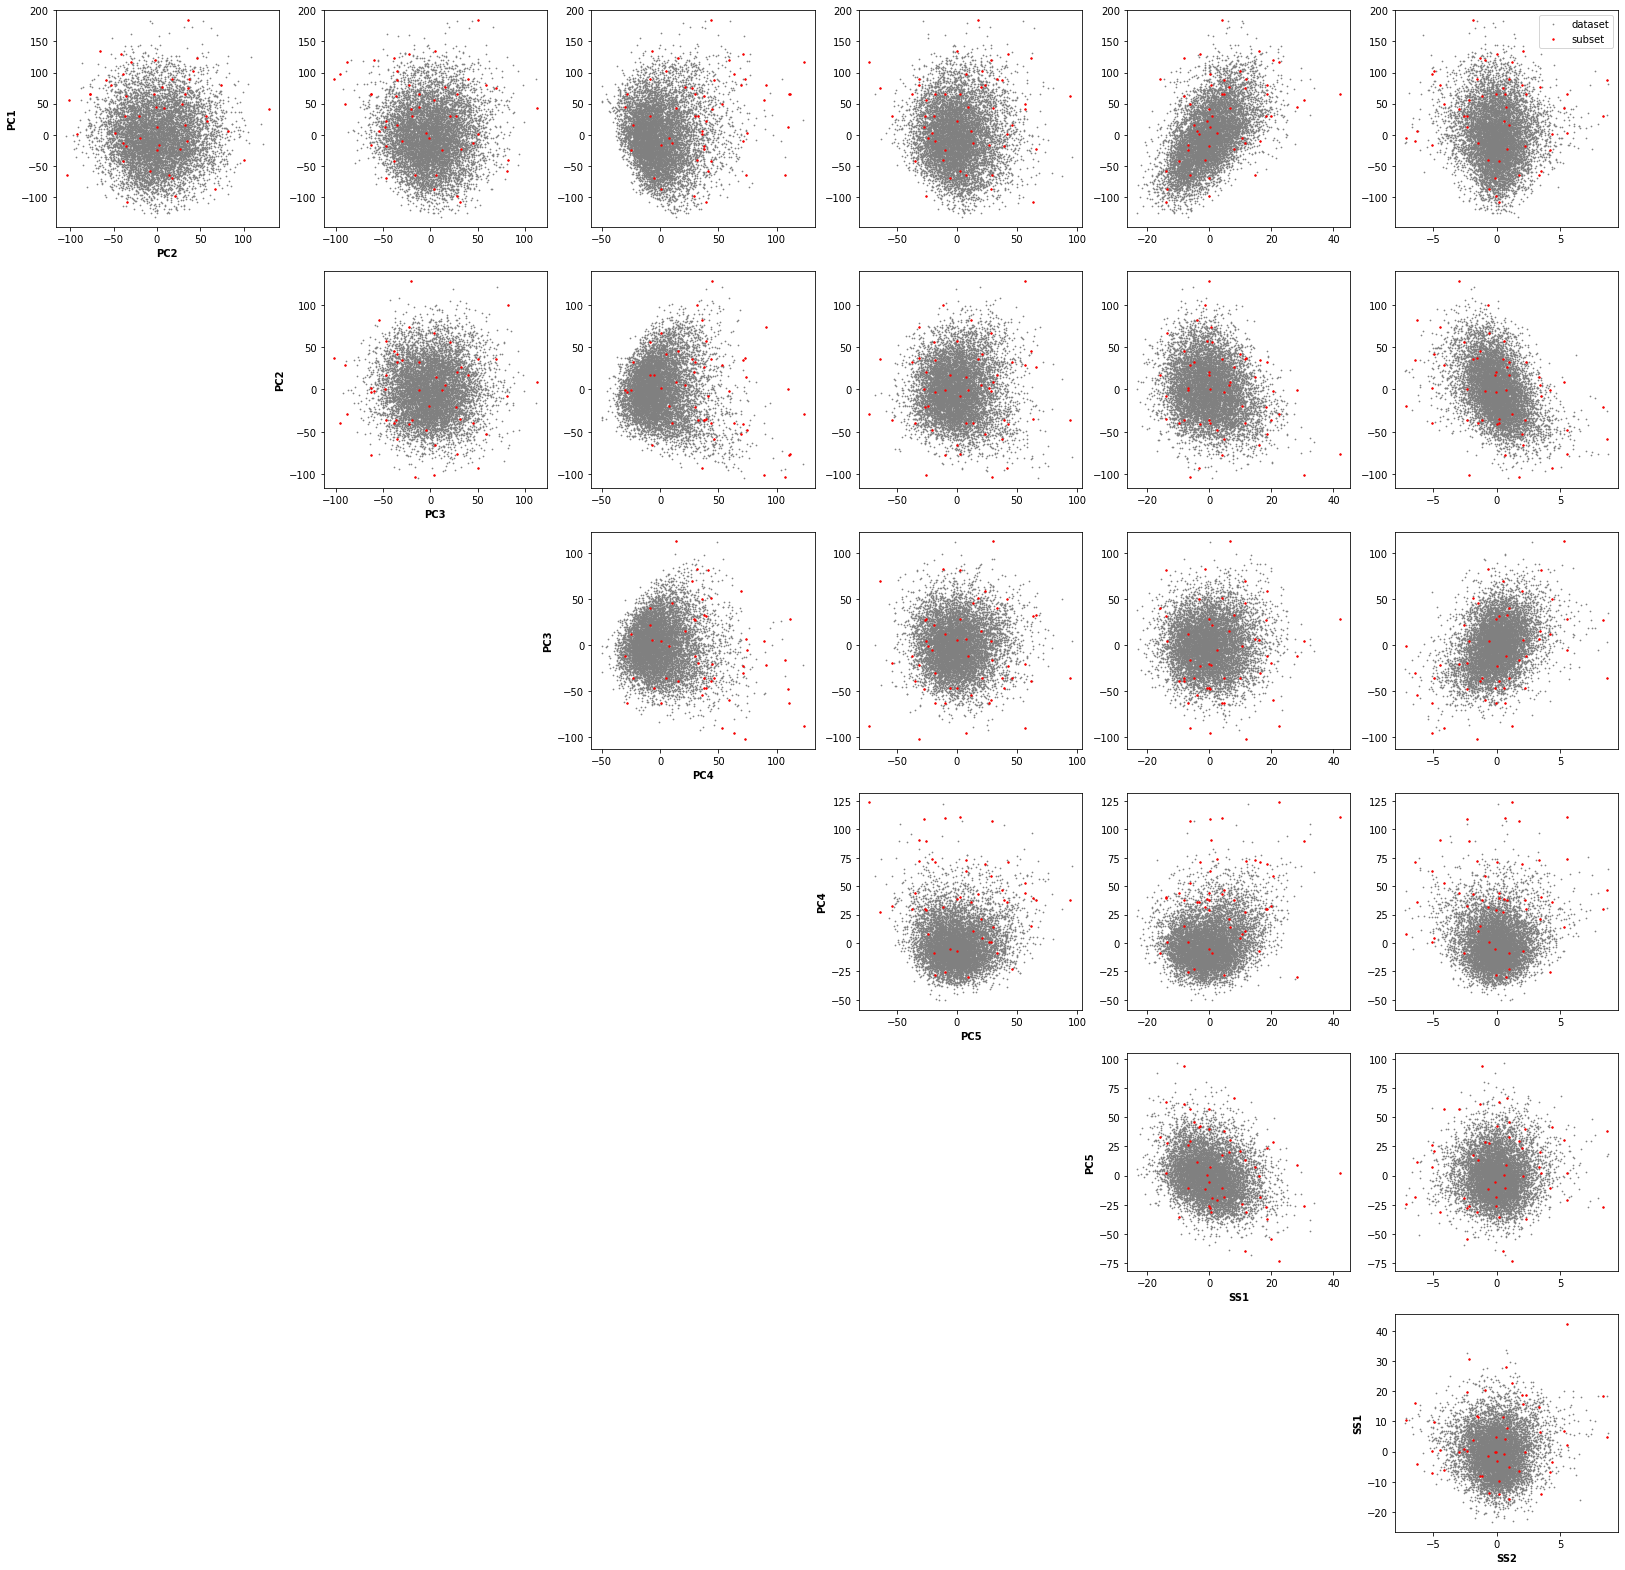

We finally have 54 points to interpolate with RBF!! 


ix_scalar: 0,  optimization: 0.35 | interpolation: 0.45 | sigma: 0.4456
ix_scalar: 1,  optimization: 0.55 | interpolation: 0.45 | sigma: 0.4532


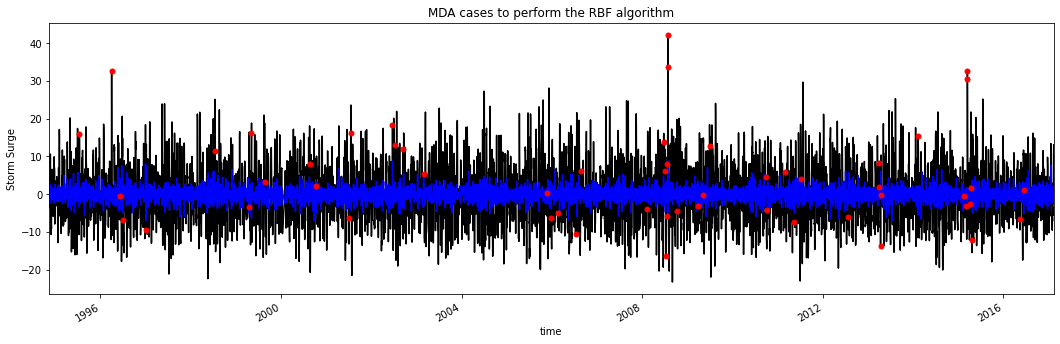

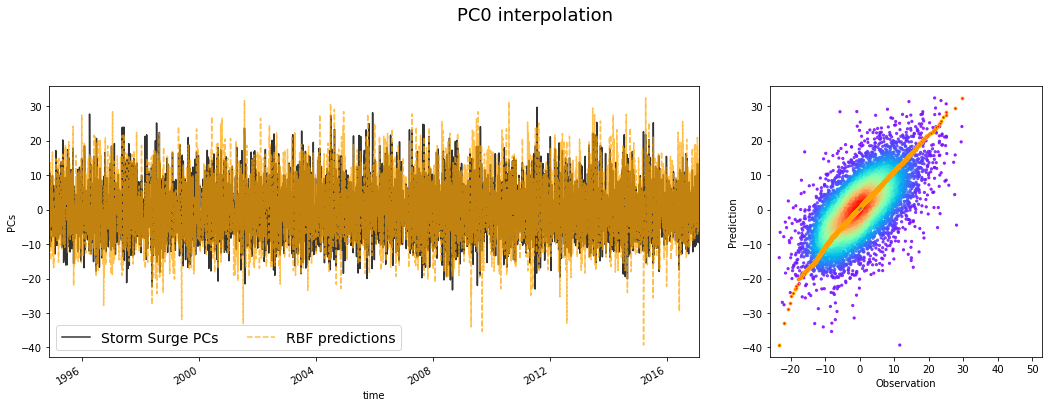

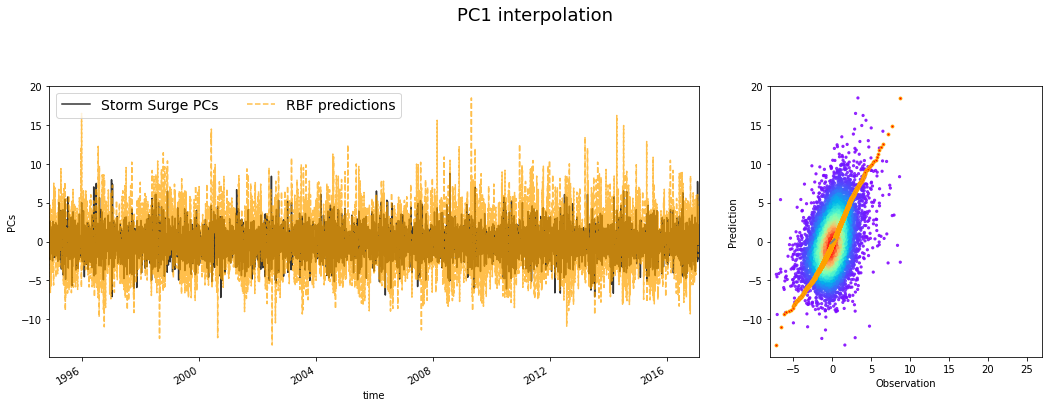

RBFs Kfold Validation: 1/2
ix_scalar: 0,  optimization: 0.13 | interpolation: 0.00 | sigma: 0.0021
ix_scalar: 1,  optimization: 0.09 | interpolation: 0.00 | sigma: 0.0022
mean squared error : 113.24693985023063

RBFs Kfold Validation: 2/2
ix_scalar: 0,  optimization: 0.09 | interpolation: 0.00 | sigma: 0.0021
ix_scalar: 1,  optimization: 0.17 | interpolation: 0.00 | sigma: 0.0016
mean squared error : 40.71511748157751

<xarray.Dataset>
Dimensions:             (n_split: 2, train: 27, test: 27)
Coordinates:
  * n_split             (n_split) int64 0 1
Dimensions without coordinates: train, test
Data variables:
    mean_squared_error  (n_split) float64 113.2 40.72
    train_index         (train, n_split) float64 0.0 2.0 1.0 ... 52.0 51.0 53.0
    test_index          (test, n_split) float64 2.0 0.0 4.0 ... 49.0 53.0 51.0

 Lets plot the SS reconstructions for location 3!! 


 KFold=1 || Lets reconstruct the SS for location 3!! 


 ------------------------------------------------------------

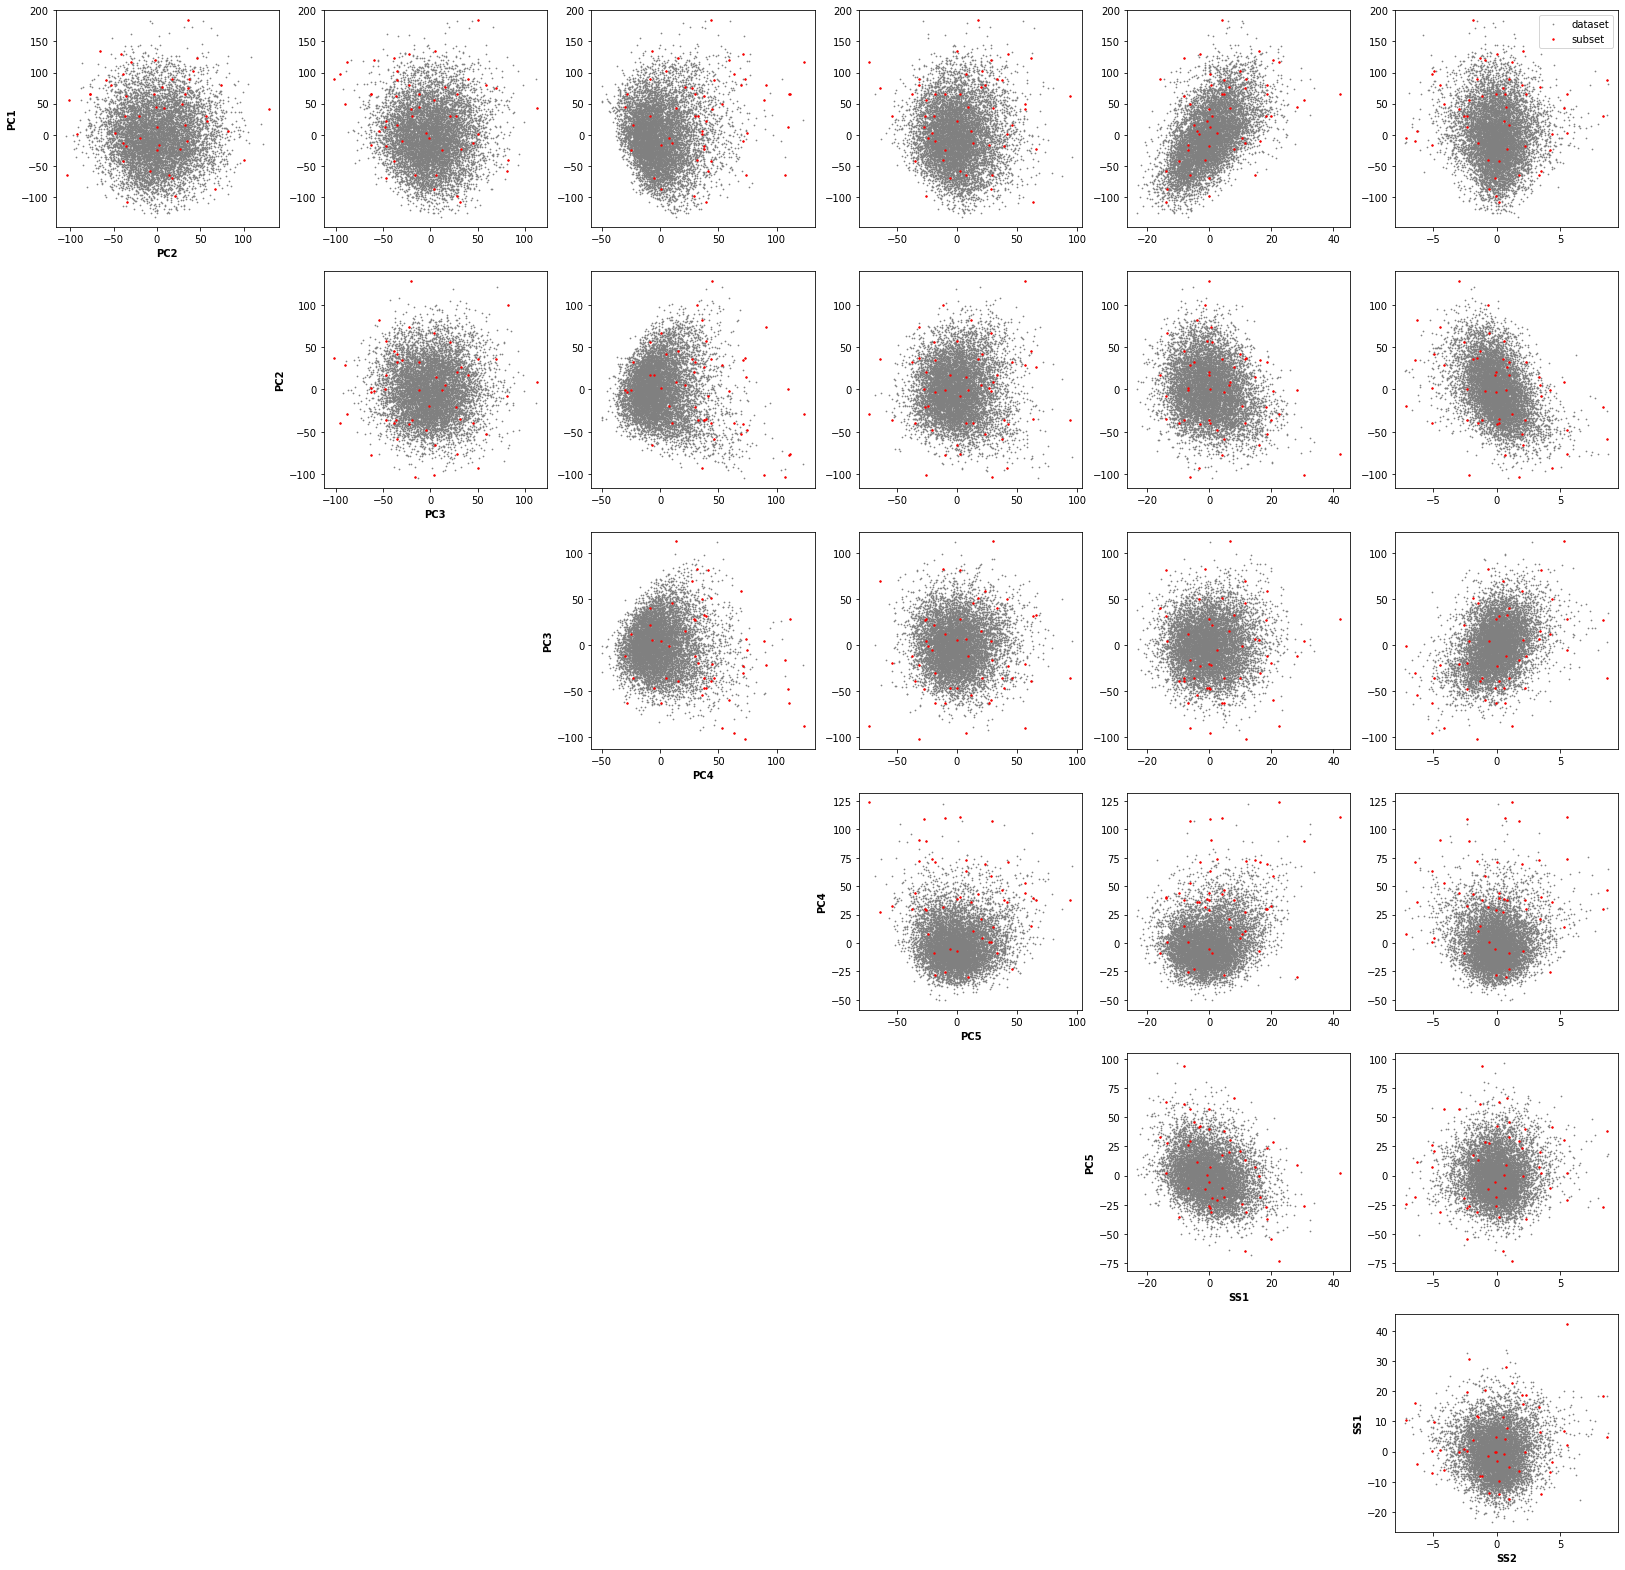

We finally have 54 points to interpolate with RBF!! 


ix_scalar: 0,  optimization: 0.36 | interpolation: 0.51 | sigma: 0.5083
ix_scalar: 1,  optimization: 0.66 | interpolation: 0.67 | sigma: 0.6729


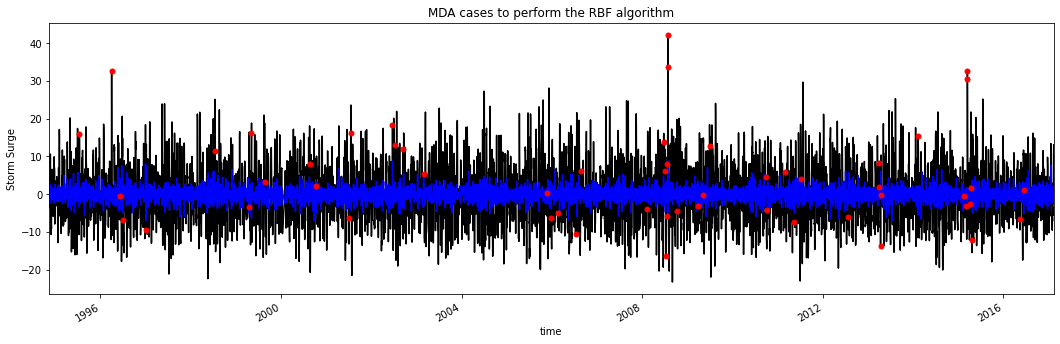

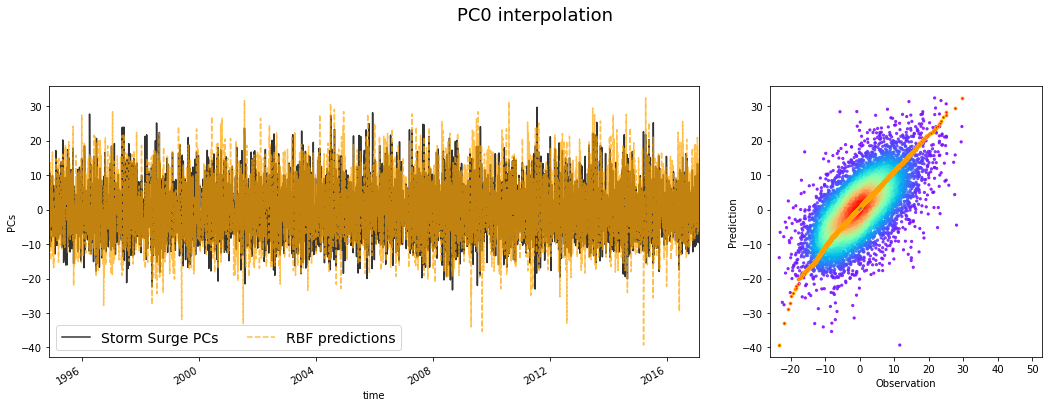

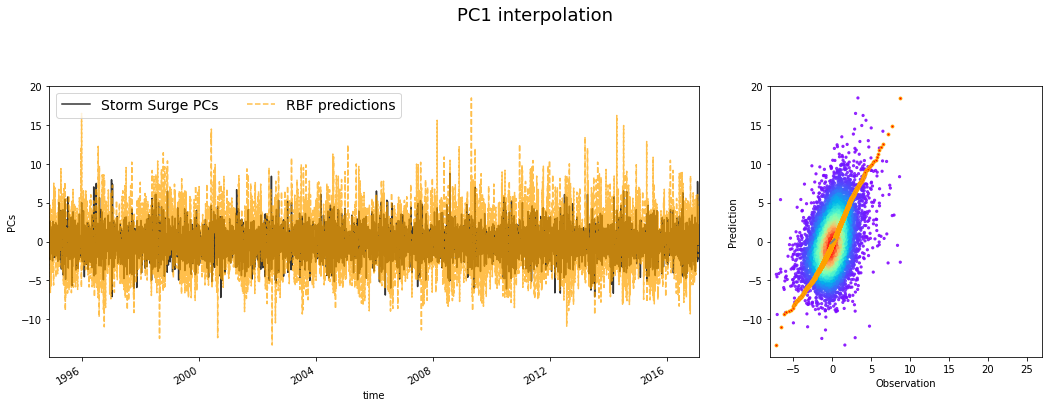

RBFs Kfold Validation: 1/2
ix_scalar: 0,  optimization: 0.19 | interpolation: 0.00 | sigma: 0.0027
ix_scalar: 1,  optimization: 0.19 | interpolation: 0.00 | sigma: 0.0023
mean squared error : 89.35938844929619

RBFs Kfold Validation: 2/2
ix_scalar: 0,  optimization: 0.20 | interpolation: 0.00 | sigma: 0.0021
ix_scalar: 1,  optimization: 0.19 | interpolation: 0.00 | sigma: 0.0015
mean squared error : 56.65763817323919

<xarray.Dataset>
Dimensions:             (n_split: 2, train: 27, test: 27)
Coordinates:
  * n_split             (n_split) int64 0 1
Dimensions without coordinates: train, test
Data variables:
    mean_squared_error  (n_split) float64 89.36 56.66
    train_index         (train, n_split) float64 0.0 1.0 2.0 ... 49.0 52.0 53.0
    test_index          (test, n_split) float64 1.0 0.0 5.0 ... 51.0 53.0 52.0

 Lets plot the SS reconstructions for location 3!! 


 KFold=0 || Lets reconstruct the SS for location 4!! 


 -------------------------------------------------------------

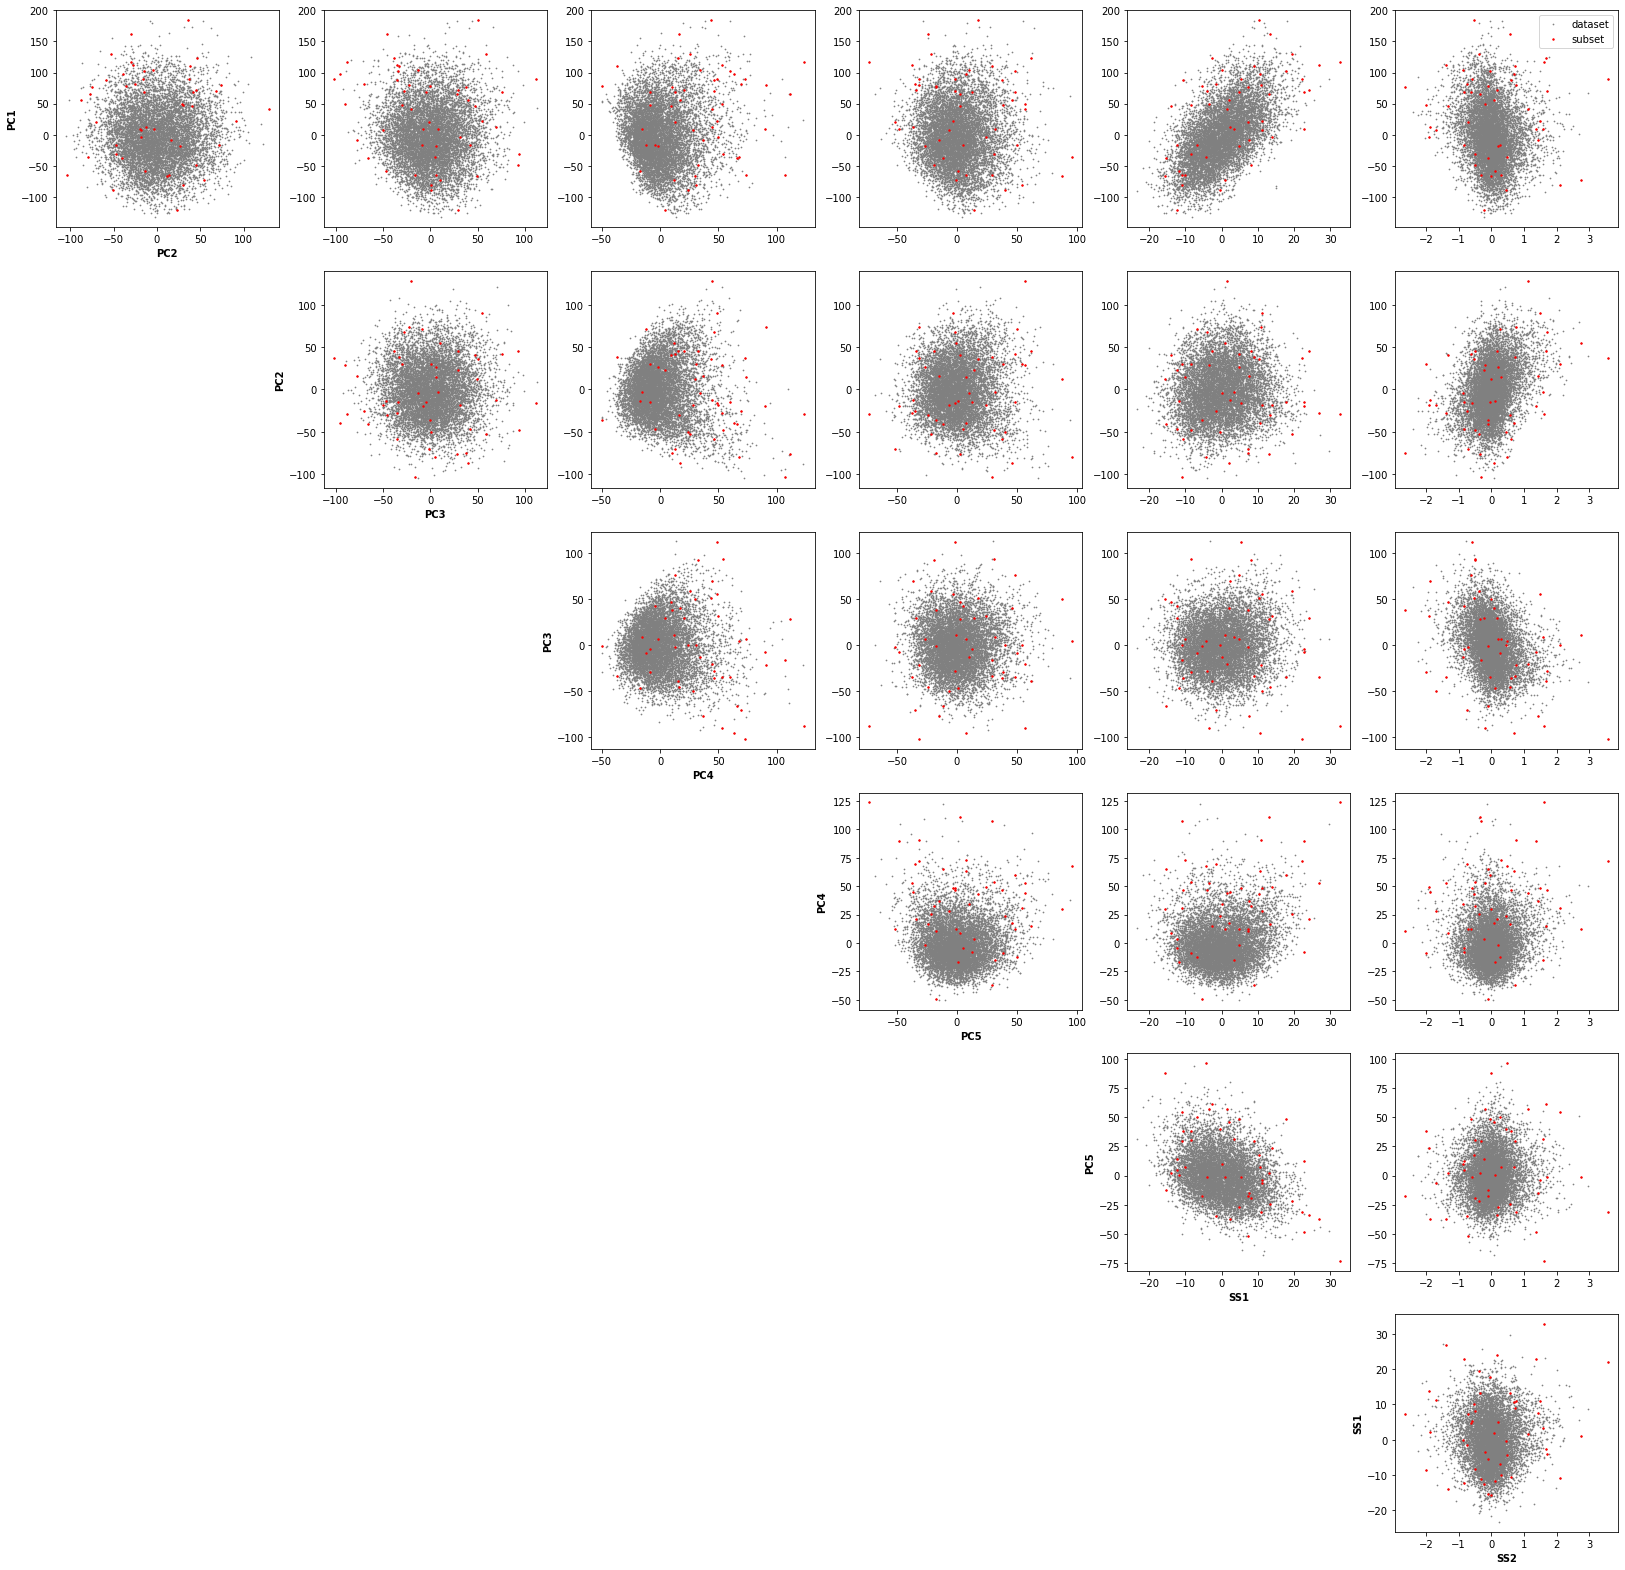

We finally have 55 points to interpolate with RBF!! 


ix_scalar: 0,  optimization: 0.33 | interpolation: 0.50 | sigma: 0.4976
ix_scalar: 1,  optimization: 0.84 | interpolation: 0.47 | sigma: 0.4699


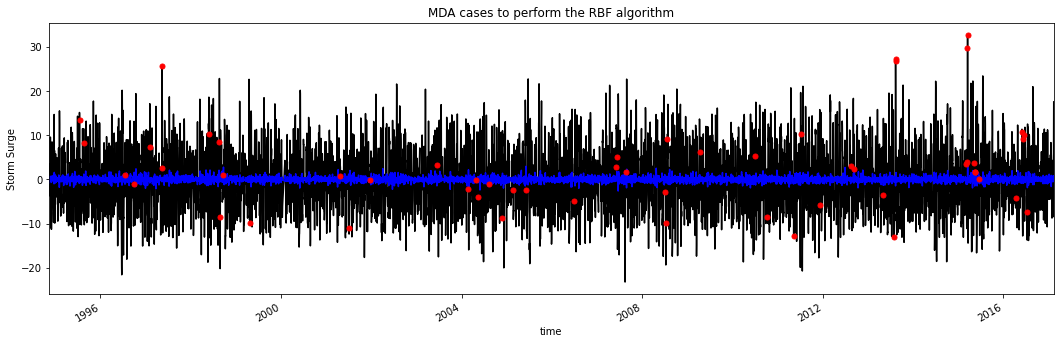

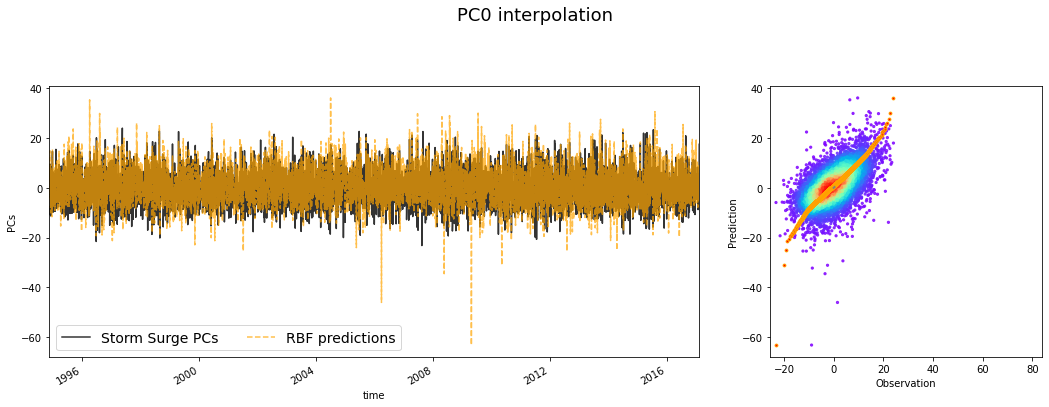

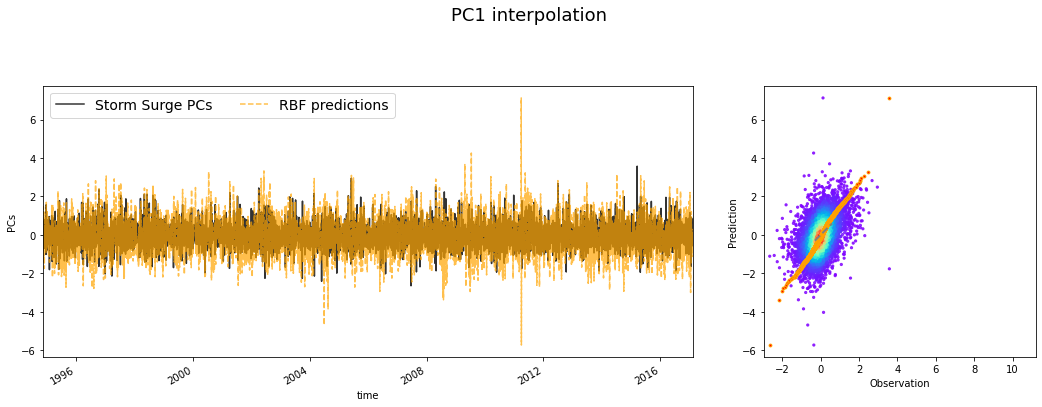

RBFs Kfold Validation: 1/2
ix_scalar: 0,  optimization: 0.30 | interpolation: 0.00 | sigma: 0.0035
ix_scalar: 1,  optimization: 0.20 | interpolation: 0.00 | sigma: 0.0034
mean squared error : 61.391637609016385

RBFs Kfold Validation: 2/2
ix_scalar: 0,  optimization: 0.19 | interpolation: 0.00 | sigma: 0.0027
ix_scalar: 1,  optimization: 0.29 | interpolation: 0.00 | sigma: 0.0044
mean squared error : 39.48347880368285

<xarray.Dataset>
Dimensions:             (n_split: 2, train: 28, test: 28)
Coordinates:
  * n_split             (n_split) int64 0 1
Dimensions without coordinates: train, test
Data variables:
    mean_squared_error  (n_split) float64 61.39 39.48
    train_index         (train, n_split) float64 2.0 0.0 6.0 ... 47.0 nan 53.0
    test_index          (test, n_split) float64 0.0 2.0 1.0 ... 54.0 53.0 nan

 Lets plot the SS reconstructions for location 4!! 


 KFold=1 || Lets reconstruct the SS for location 4!! 


 ------------------------------------------------------------- 

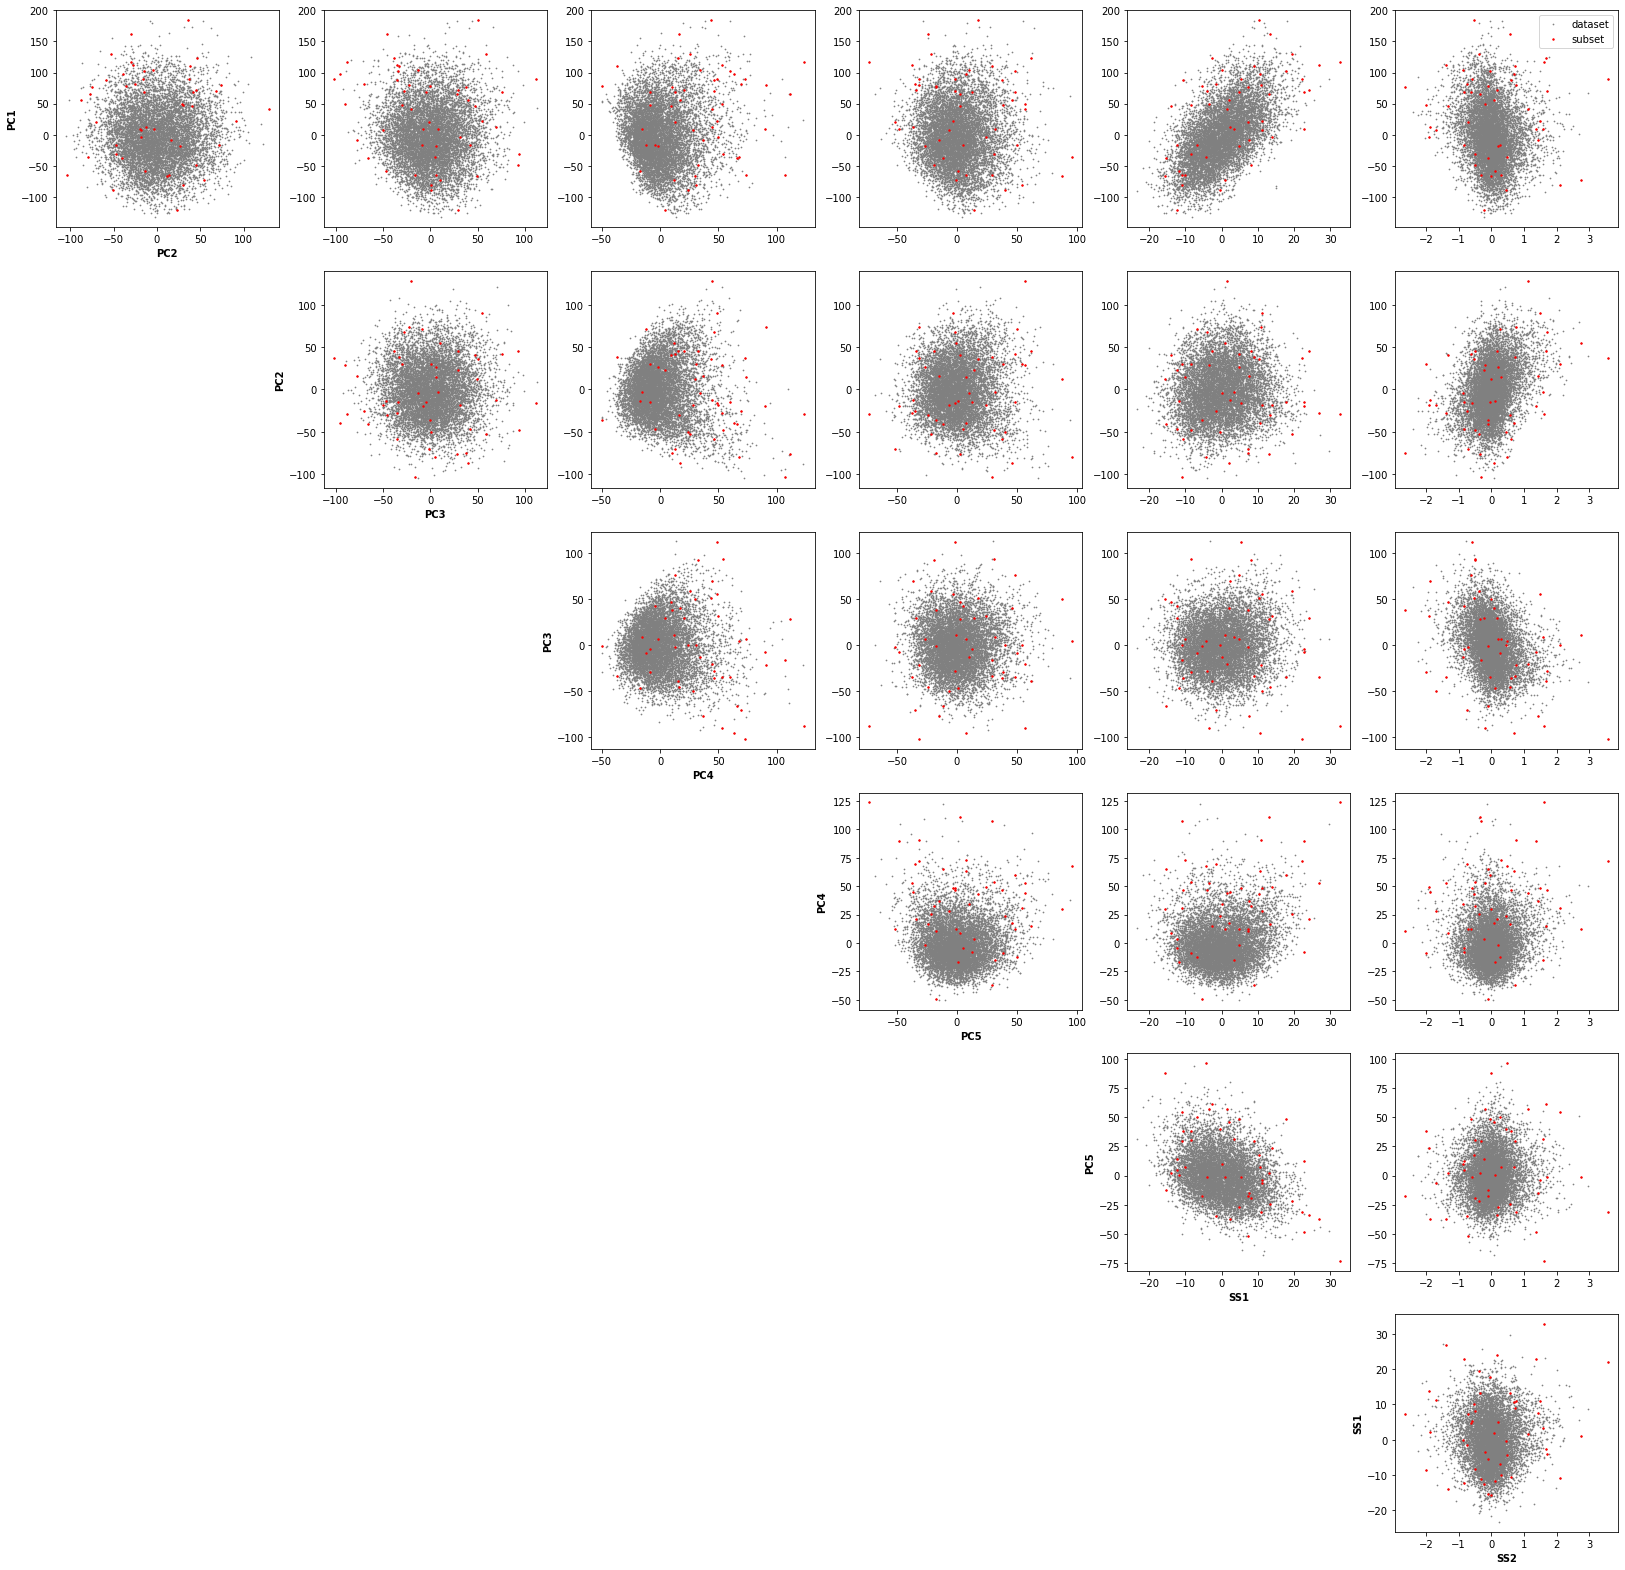

We finally have 55 points to interpolate with RBF!! 


ix_scalar: 0,  optimization: 0.32 | interpolation: 0.46 | sigma: 0.4605
ix_scalar: 1,  optimization: 0.79 | interpolation: 0.46 | sigma: 0.4626


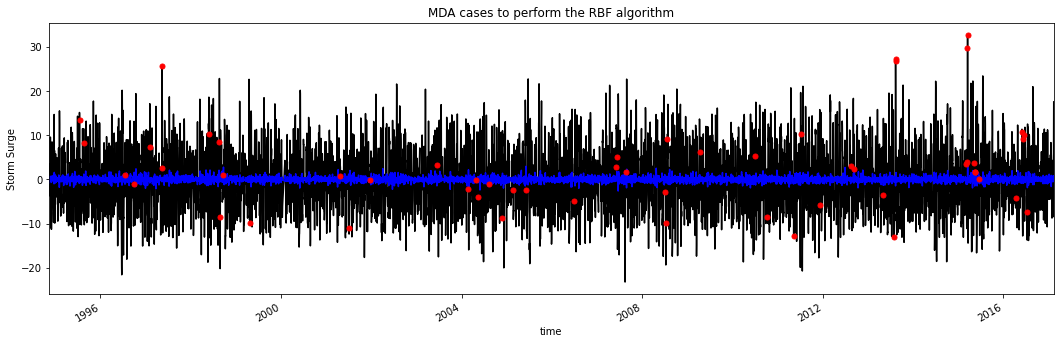

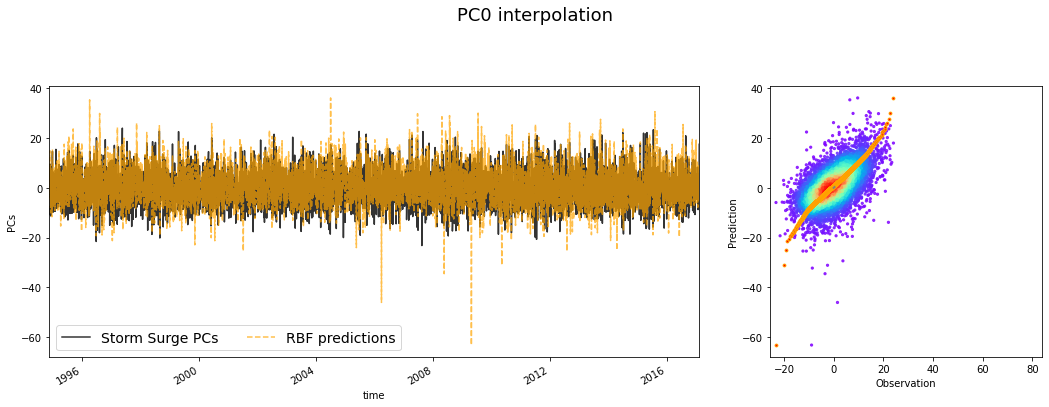

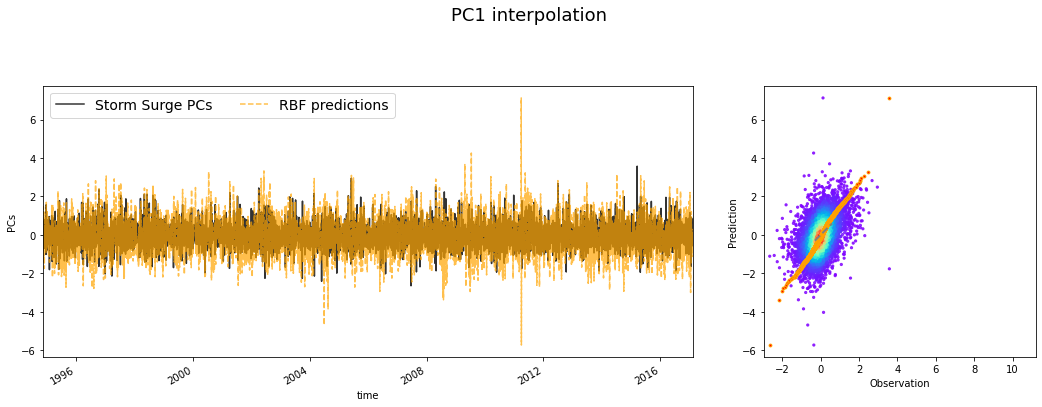

RBFs Kfold Validation: 1/2
ix_scalar: 0,  optimization: 0.16 | interpolation: 0.00 | sigma: 0.0022
ix_scalar: 1,  optimization: 0.18 | interpolation: 0.00 | sigma: 0.0022
mean squared error : 175.41921026074792

RBFs Kfold Validation: 2/2
ix_scalar: 0,  optimization: 0.16 | interpolation: 0.00 | sigma: 0.0021
ix_scalar: 1,  optimization: 0.17 | interpolation: 0.00 | sigma: 0.0022
mean squared error : 49.21291415618039

<xarray.Dataset>
Dimensions:             (n_split: 2, train: 28, test: 28)
Coordinates:
  * n_split             (n_split) int64 0 1
Dimensions without coordinates: train, test
Data variables:
    mean_squared_error  (n_split) float64 175.4 49.21
    train_index         (train, n_split) float64 1.0 0.0 3.0 ... 52.0 nan 53.0
    test_index          (test, n_split) float64 0.0 1.0 2.0 ... 54.0 53.0 nan

 Lets plot the SS reconstructions for location 4!! 



In [8]:
# calculate the MDA + RBF adjustments
interpolated_ss_by_rbf = mda_rbf_model.calc_MDA_RBF(
    selected_shores=np.arange(len(mda_rbf_model.shore_sites)), # indexes in python counter
    percentage_pcs_ini=[0.90], # this is for the SLP
    num_samples_ini=[50],
    ss_pcs=2, append_extremes=5, try_all=True, plot=True,
    validate_rbf_kfold=(True,2)
    # the ss_pcs parameter is very important, set to 1 when working with single locations
)

```{warning}
Run the CELL below to run all the combinations, but be careful with the time it might take. Moreover, if the num_samples_ini parameter is too big, the searching of the optimal sigma in the RBF funtion might not converge!!
```

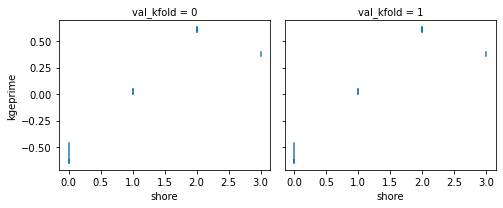

In [11]:
interpolated_ss_by_rbf.kgeprime.plot(col='val_kfold')

In [ ]:
# interpolated_ss_by_rbf.to_netcdf(
#     '../data/statistics/experiments/experiment_mdarbf_sites_1D_5local_winds_grad.nc')

In [ ]:
for label in ['kgeprime','pearson','rmse_95']:
    fig, ax = plt.subplots(figsize=(14,4))
    p = ax.pcolor(interpolated_ss_by_rbf[label].values)
    fig.colorbar(p)
    ax.set_title(label)
    plt.show()